In [483]:
from importlib import reload
import optimization
import svm
import numpy as np
from sklearn.datasets import make_moons
import timeit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

reload(optimization)
reload(svm)


<module 'svm' from '/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/svm.py'>

In [484]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

Для проведения исследований необходимо генерировать модельные данные различной сложности. Обяза- тельно необходимо рассматривать случаи:


• линейно разделимых данных


• хорошо разделимых данных, но линейно неразделимых


• плохо разделимых данных


• данные с несбалансированными классами, данные с выбросами 

Требуется провести следующие исследования:
1. Исследовать зависимость времени работы реализованных различных реализаций (из обязательной части) линейного SVM от размерности признакового пространства и числа объектов в обучающей выборке. Исследовать скорость сходимости методов. Сравнить методы по полученным значениям целевой функции.

In [3]:
#generate lin separable data

def lin_sep(l, d):
    X_lin_sep = np.vstack((np.random.uniform(high=1, low=0.5, size=(l // 2) * d).reshape((l // 2), d), \
                      np.random.uniform(high=-0.5, low=-1, size=(l // 2) * d).reshape((l // 2), d)))
    y_lin_sep = np.hstack((np.ones((l // 2)), -np.ones((l // 2))))
    return X_lin_sep, y_lin_sep

In [150]:
#generate nonlin separable data

def nonlin_sep(l, d):
    X_nonlin_sep, y_nonlin_sep = make_moons(n_samples=l)
    y_nonlin_sep[y_nonlin_sep == 0] = -1
    if d > 2:
        X_nonlin_sep = np.hstack((X_nonlin_sep, (np.random.uniform(high=1, low=0.5, size=l * (d - 2)).reshape(l, (d - 2)))))
    return X_nonlin_sep, y_nonlin_sep

In [151]:
#generate not separable data

def non_sep(l, d):
    X_non_sep = np.random.uniform(high=1, low=0.5, size=l * d).reshape(l, d)
    y_non_sep = np.hstack((np.ones((l // 2)), -np.ones((l // 2))))
    return X_non_sep, y_non_sep

In [152]:
#generate not balanced data

def notbalanced(l, d):
    X_notbalanced = np.vstack((np.random.uniform(high=1, low=0.5, size=round(0.7 * l) * d).reshape(round(0.7 * l), d), \
                      np.random.uniform(high=-0.5, low=-1, size=(l - round(0.7 * l)) * d).reshape(l - round(0.7 * l), d)))
    y_notbalanced = np.hstack((np.ones(round(0.7 * l)), -np.ones(l - round(0.7 * l))))
    return X_notbalanced, y_notbalanced

In [153]:
#generate data with outliers

def with_outliers(l, d):
    X_with_outliers = np.vstack((np.random.uniform(high=1, low=0.5, size=(l // 2) * d).reshape((l // 2), d), \
                      np.random.uniform(high=-0.5, low=-1, size=(l // 2) * d).reshape((l // 2), d)))
    y_with_outliers = np.hstack((np.ones(round(0.45 * l)), -np.ones(round(0.5 * l)), np.ones(l - round(0.45 * l) - round(0.5 * l))))
    return X_with_outliers, y_with_outliers

In [70]:
l_values = [10, 100, 1000]
d_values = [10, 100, 1000]

In [482]:
#pegasos
res_for_pegasos_linsep = {}
res_for_pegasos_nonlinsep = {}
res_for_pegasos_nonsep = {}
res_for_pegasos_notbalanced = {}
res_for_pegasos_with_outliers = {}

for l in l_values:
    for d in d_values:
        clf = optimization.PEGASOSMethod(step_lambda=1, batch_size=10, num_iter=100)
        
        X, y = lin_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_pegasos_linsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.func(X, y), 3)}
        
        X, y = nonlin_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_pegasos_nonlinsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.func(X, y), 3)}
        
        X, y = non_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_pegasos_nonsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.func(X, y), 3)}
        
        X, y = notbalanced(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_pegasos_notbalanced[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.func(X, y), 3)}
        
        X, y = with_outliers(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_pegasos_with_outliers[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.func(X, y), 3)}

(10, 10) (10,)
(10, 10) (10,)
(10, 10) (10,)
(10, 10) (10,)
(10, 10) (10,)
(10, 100) (10,)
(10, 100) (10,)
(10, 100) (10,)
(10, 100) (10,)
(10, 100) (10,)
(10, 1000) (10,)
(10, 1000) (10,)
(10, 1000) (10,)
(10, 1000) (10,)
(10, 1000) (10,)
(100, 10) (100,)
(100, 10) (100,)
(100, 10) (100,)
(100, 10) (100,)
(100, 10) (100,)
(100, 100) (100,)
(100, 100) (100,)
(100, 100) (100,)
(100, 100) (100,)
(100, 100) (100,)
(100, 1000) (100,)
(100, 1000) (100,)
(100, 1000) (100,)
(100, 1000) (100,)
(100, 1000) (100,)
(1000, 10) (1000,)
(1000, 10) (1000,)
(1000, 10) (1000,)
(1000, 10) (1000,)
(1000, 10) (1000,)
(1000, 100) (1000,)
(1000, 100) (1000,)
(1000, 100) (1000,)
(1000, 100) (1000,)
(1000, 100) (1000,)
(1000, 1000) (1000,)
(1000, 1000) (1000,)
(1000, 1000) (1000,)
(1000, 1000) (1000,)
(1000, 1000) (1000,)


In [97]:
print('pegasos_linsep:', '\n\n', res_for_pegasos_linsep, '\n\n',
'pegasos_nonlinsep:', '\n\n', res_for_pegasos_nonlinsep,'\n\n',
'pegasos_nonsep:', '\n\n', res_for_pegasos_nonsep,'\n\n',
'pegasos_notbalanced:', '\n\n', res_for_pegasos_notbalanced,'\n\n',
'pegasos_with_outliers:', '\n\n', res_for_pegasos_with_outliers)

pegasos_linsep: 

 {(10, 10): {'time': 0.018, 'objective': 0.097000000000000003}, (10, 100): {'time': 0.012, 'objective': 0.0089999999999999993}, (10, 1000): {'time': 0.02, 'objective': 0.001}, (100, 10): {'time': 0.01, 'objective': 0.109}, (100, 100): {'time': 0.012, 'objective': 0.01}, (100, 1000): {'time': 0.02, 'objective': 0.001}, (1000, 10): {'time': 0.014, 'objective': 0.106}, (1000, 100): {'time': 0.023, 'objective': 0.01}, (1000, 1000): {'time': 0.174, 'objective': 0.001}} 

 pegasos_nonlinsep: 

 {(10, 10): {'time': 0.012, 'objective': 0.77900000000000003}, (10, 100): {'time': 0.014, 'objective': 0.57799999999999996}, (10, 1000): {'time': 0.016, 'objective': 0.32300000000000001}, (100, 10): {'time': 0.011, 'objective': 0.79900000000000004}, (100, 100): {'time': 0.013, 'objective': 0.79400000000000004}, (100, 1000): {'time': 0.02, 'objective': 0.872}, (1000, 10): {'time': 0.013, 'objective': 0.80400000000000005}, (1000, 100): {'time': 0.024, 'objective': 0.82499999999999996}, 

In [98]:
#gradient
res_for_gradient_linsep = {}
res_for_gradient_nonlinsep = {}
res_for_gradient_nonsep = {}
res_for_gradient_notbalanced = {}
res_for_gradient_with_outliers = {}

for l in l_values:
    for d in d_values:
        clf = optimization.GDClassifier(loss_function='binary_hinge', max_iter=10000)
        
        X, y = lin_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_gradient_linsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.get_objective(X, y), 3)}
        
        X, y = nonlin_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_gradient_nonlinsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.get_objective(X, y), 3)}
        
        X, y = non_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_gradient_nonsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.get_objective(X, y), 3)}
        
        X, y = notbalanced(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_gradient_notbalanced[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.get_objective(X, y), 3)}
        
        X, y = with_outliers(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_gradient_with_outliers[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.get_objective(X, y), 3)}

(10, 10) (10,)
(10, 10) (10,)
(10, 10) (10,)
(10, 10) (10,)
(10, 10) (10,)
(10, 100) (10,)
(10, 100) (10,)
(10, 100) (10,)
(10, 100) (10,)
(10, 100) (10,)
(10, 1000) (10,)
(10, 1000) (10,)
(10, 1000) (10,)
(10, 1000) (10,)
(10, 1000) (10,)
(100, 10) (100,)
(100, 10) (100,)
(100, 10) (100,)
(100, 10) (100,)
(100, 10) (100,)
(100, 100) (100,)
(100, 100) (100,)
(100, 100) (100,)
(100, 100) (100,)
(100, 100) (100,)
(100, 1000) (100,)
(100, 1000) (100,)
(100, 1000) (100,)
(100, 1000) (100,)
(100, 1000) (100,)
(1000, 10) (1000,)
(1000, 10) (1000,)
(1000, 10) (1000,)
(1000, 10) (1000,)
(1000, 10) (1000,)
(1000, 100) (1000,)
(1000, 100) (1000,)
(1000, 100) (1000,)
(1000, 100) (1000,)
(1000, 100) (1000,)
(1000, 1000) (1000,)
(1000, 1000) (1000,)
(1000, 1000) (1000,)
(1000, 1000) (1000,)
(1000, 1000) (1000,)


In [99]:
print('gradient_linsep:', '\n\n', res_for_gradient_linsep, '\n\n',
'gradient_nonlinsep:', '\n\n', res_for_gradient_nonlinsep,'\n\n',
'gradient_nonsep:', '\n\n', res_for_gradient_nonsep,'\n\n',
'gradient_notbalanced:', '\n\n', res_for_gradient_notbalanced,'\n\n',
'gradient_with_outliers:', '\n\n', res_for_gradient_with_outliers)

gradient_linsep: 

 {(10, 10): {'time': 0.003, 'objective': 0.0}, (10, 100): {'time': 0.002, 'objective': 0.0}, (10, 1000): {'time': 0.002, 'objective': 0.0}, (100, 10): {'time': 0.003, 'objective': 0.0}, (100, 100): {'time': 0.005, 'objective': 0.0}, (100, 1000): {'time': 0.022, 'objective': 0.0}, (1000, 10): {'time': 0.006, 'objective': 0.0}, (1000, 100): {'time': 0.025, 'objective': 0.0}, (1000, 1000): {'time': 0.401, 'objective': 0.0}} 

 gradient_nonlinsep: 

 {(10, 10): {'time': 0.746, 'objective': 3.5049999999999999}, (10, 100): {'time': 0.775, 'objective': 42.874000000000002}, (10, 1000): {'time': 1.215, 'objective': 445.44099999999997}, (100, 10): {'time': 1.02, 'objective': 3.2120000000000002}, (100, 100): {'time': 1.818, 'objective': 39.5}, (100, 1000): {'time': 7.067, 'objective': 398.584}, (1000, 10): {'time': 1.839, 'objective': 3.1280000000000001}, (1000, 100): {'time': 7.541, 'objective': 39.210999999999999}, (1000, 1000): {'time': 98.691, 'objective': 312.923}} 

 grad

In [100]:
#stochastic

res_for_stochastic_linsep = {}
res_for_stochastic_nonlinsep = {}
res_for_stochastic_nonsep = {}
res_for_stochastic_notbalanced = {}
res_for_stochastic_with_outliers = {}

for l in l_values:
    for d in d_values:
        clf = optimization.SGDClassifier(loss_function='binary_hinge', max_iter=10000)
        
        X, y = lin_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_stochastic_linsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.get_objective(X, y), 3)}
        
        X, y = nonlin_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_stochastic_nonlinsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.get_objective(X, y), 3)}
        
        X, y = non_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_stochastic_nonsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.get_objective(X, y), 3)}
        
        X, y = notbalanced(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_stochastic_notbalanced[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.get_objective(X, y), 3)}
        
        X, y = with_outliers(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_stochastic_with_outliers[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.get_objective(X, y), 3)}

(10, 10) (10,)
6
(10, 10) (10,)
9
(10, 10) (10,)
31
(10, 10) (10,)
6
(10, 10) (10,)
15
(10, 100) (10,)
6
(10, 100) (10,)
9
(10, 100) (10,)
11
(10, 100) (10,)
4
(10, 100) (10,)
25
(10, 1000) (10,)
6
(10, 1000) (10,)
9
(10, 1000) (10,)
19
(10, 1000) (10,)
4
(10, 1000) (10,)
7
(100, 10) (100,)
6
(100, 10) (100,)
9
(100, 10) (100,)
23
(100, 10) (100,)
8
(100, 10) (100,)
11
(100, 100) (100,)
8
(100, 100) (100,)
11
(100, 100) (100,)
65
(100, 100) (100,)
4
(100, 100) (100,)
11
(100, 1000) (100,)
6
(100, 1000) (100,)
9
(100, 1000) (100,)
99
(100, 1000) (100,)
4
(100, 1000) (100,)
11
(1000, 10) (1000,)
6
(1000, 10) (1000,)
12
(1000, 10) (1000,)
32
(1000, 10) (1000,)
6
(1000, 10) (1000,)
6
(1000, 100) (1000,)
8
(1000, 100) (1000,)
4
(1000, 100) (1000,)
46
(1000, 100) (1000,)
4
(1000, 100) (1000,)
8
(1000, 1000) (1000,)
6
(1000, 1000) (1000,)
12
(1000, 1000) (1000,)
73
(1000, 1000) (1000,)
4
(1000, 1000) (1000,)
6


In [101]:
print('stochastic_linsep:', '\n\n', res_for_stochastic_linsep, '\n\n',
'stochastic_nonlinsep:', '\n\n', res_for_stochastic_nonlinsep,'\n\n',
'stochastic_nonsep:', '\n\n', res_for_stochastic_nonsep,'\n\n',
'stochastic_notbalanced:', '\n\n', res_for_stochastic_notbalanced,'\n\n',
'stochastic_with_outliers:', '\n\n', res_for_stochastic_with_outliers)

stochastic_linsep: 

 {(10, 10): {'time': 0.001, 'objective': 0.0060000000000000001}, (10, 100): {'time': 0.001, 'objective': 0.0}, (10, 1000): {'time': 0.001, 'objective': 0.0}, (100, 10): {'time': 0.001, 'objective': 0.014999999999999999}, (100, 100): {'time': 0.001, 'objective': 0.0}, (100, 1000): {'time': 0.001, 'objective': 0.014}, (1000, 10): {'time': 0.001, 'objective': 0.012}, (1000, 100): {'time': 0.002, 'objective': 0.0}, (1000, 1000): {'time': 0.004, 'objective': 0.001}} 

 stochastic_nonlinsep: 

 {(10, 10): {'time': 0.001, 'objective': 0.82399999999999995}, (10, 100): {'time': 0.001, 'objective': 0.82399999999999995}, (10, 1000): {'time': 0.001, 'objective': 0.82399999999999995}, (100, 10): {'time': 0.002, 'objective': 0.746}, (100, 100): {'time': 0.002, 'objective': 0.99399999999999999}, (100, 1000): {'time': 0.002, 'objective': 0.746}, (1000, 10): {'time': 0.002, 'objective': 0.73899999999999999}, (1000, 100): {'time': 0.001, 'objective': 0.71899999999999997}, (1000, 100

In [102]:
#SVM lin


res_for_lin_linsep = {}
res_for_lin_nonlinsep = {}
res_for_lin_nonsep = {}
res_for_lin_notbalanced = {}
res_for_lin_with_outliers = {}

for l in l_values:
    for d in d_values:
        clf = svm.SVMSolver(C=1, method='primal')
        
        X, y = lin_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_lin_linsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_primal_objective(X, y), 3)}
        
        X, y = nonlin_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_lin_nonlinsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_primal_objective(X, y), 3)}
        
        X, y = non_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_lin_nonsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_primal_objective(X, y), 3)}
        
        X, y = notbalanced(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_lin_notbalanced[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_primal_objective(X, y), 3)}
        
        X, y = with_outliers(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_lin_with_outliers[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_primal_objective(X, y), 3)}

(10, 10) (10,)
     pcost       dcost       gap    pres   dres
 0:  2.2375e-02  1.1481e+00  2e+01  2e+00  3e+01
 1:  1.0345e+00  9.0919e-02  9e-01  4e-16  2e-15
 2:  1.2022e-01  9.3756e-02  3e-02  4e-16  1e-16
 3:  1.0623e-01  1.0161e-01  5e-03  8e-17  9e-17
 4:  1.0300e-01  1.0253e-01  5e-04  1e-16  1e-16
 5:  1.0274e-01  1.0271e-01  3e-05  1e-16  2e-15
 6:  1.0272e-01  1.0272e-01  3e-06  1e-16  3e-14
 7:  1.0272e-01  1.0272e-01  4e-08  1e-16  6e-14
Optimal solution found.
(10, 10) (10,)
     pcost       dcost       gap    pres   dres
 0:  6.3397e-01  4.4204e+00  5e+01  2e+00  1e+01
 1:  1.9779e+00  1.0229e-01  2e+00  3e-02  2e-01
 2:  8.8174e-01  7.5743e-01  1e-01  3e-16  4e-16
 3:  8.2566e-01  8.1775e-01  8e-03  2e-16  2e-15
 4:  8.2379e-01  8.2361e-01  2e-04  3e-16  1e-14
 5:  8.2378e-01  8.2377e-01  2e-06  3e-16  4e-14
 6:  8.2378e-01  8.2378e-01  2e-08  2e-16  2e-14
Optimal solution found.
(10, 10) (10,)
     pcost       dcost       gap    pres   dres
 0:  5.6655e-01  6.5104e+00 

 2:  3.7402e-01 -7.9301e-02  5e-01  8e-04  7e-01
 3:  1.7881e-02  9.3229e-04  2e-02  2e-05  1e-02
 4:  4.3158e-03  3.2907e-03  1e-03  2e-07  1e-04
 5:  3.8126e-03  3.4565e-03  4e-04  5e-08  4e-05
 6:  3.8329e-03  3.6268e-03  2e-04  2e-16  4e-17
 7:  3.6974e-03  3.6617e-03  4e-05  2e-16  5e-17
 8:  3.6748e-03  3.6705e-03  4e-06  2e-16  1e-16
 9:  3.6723e-03  3.6723e-03  6e-08  2e-16  2e-16
Optimal solution found.
(100, 100) (100,)
     pcost       dcost       gap    pres   dres
 0:  1.7168e+00  1.1127e+01  5e+02  2e+00  1e+03
 1:  1.8644e+00 -3.6062e+01  4e+01  2e-01  7e+01
 2:  1.6441e+00 -7.0727e-01  2e+00  4e-03  2e+00
 3:  4.1883e-01  1.9919e-01  2e-01  6e-05  3e-02
 4:  2.1974e-01  2.0877e-01  1e-02  3e-06  1e-03
 5:  2.1681e-01  2.1023e-01  7e-03  6e-07  2e-04
 6:  2.1265e-01  2.1119e-01  1e-03  1e-07  4e-05
 7:  2.1189e-01  2.1160e-01  3e-04  1e-08  5e-06
 8:  2.1172e-01  2.1171e-01  1e-05  1e-10  5e-08
 9:  2.1171e-01  2.1171e-01  2e-07  2e-12  8e-10
10:  2.1171e-01  2.1171e-01 

 1:  3.0607e+00 -1.0194e+02  1e+02  4e-02  2e+01
 2:  2.4394e+00 -5.6902e+00  8e+00  3e-03  1e+00
 3:  1.7243e+00  6.8026e-01  1e+00  9e-16  3e-15
 4:  9.2994e-01  7.4156e-01  2e-01  5e-16  6e-16
 5:  8.0149e-01  7.8928e-01  1e-02  3e-16  1e-15
 6:  7.9731e-01  7.9702e-01  3e-04  3e-16  5e-14
 7:  7.9726e-01  7.9726e-01  3e-06  3e-16  1e-13
 8:  7.9726e-01  7.9726e-01  3e-08  3e-16  1e-13
Optimal solution found.
(1000, 100) (1000,)
     pcost       dcost       gap    pres   dres
 0:  2.1158e+00  4.6736e+02  7e+03  3e+00  1e+02
 1:  3.3173e+00 -1.9654e+02  2e+02  8e-02  4e+00
 2:  2.3816e+00 -5.0452e+00  7e+00  2e-03  1e-01
 3:  1.7265e+00  7.7660e-01  9e-01  9e-16  3e-15
 4:  1.0700e+00  9.3308e-01  1e-01  6e-16  1e-15
 5:  1.0001e+00  9.9843e-01  2e-03  5e-16  1e-15
 6:  9.9928e-01  9.9926e-01  2e-05  4e-16  1e-15
 7:  9.9927e-01  9.9927e-01  2e-07  4e-16  3e-15
Optimal solution found.
(1000, 100) (1000,)
     pcost       dcost       gap    pres   dres
 0:  3.1745e-03  1.6217e+00  2e+

In [389]:
print(res_for_pegasos_linsep[(100, 100)]['time'],\
    res_for_gradient_linsep[(100, 100)]['time'],\
      res_for_stochastic_linsep[(100, 100)]['time'], \
      res_for_lin_linsep[(100, 100)]['time'], '\n', \
      
     res_for_pegasos_nonlinsep[(100, 100)]['time'],\
    res_for_gradient_nonlinsep[(100, 100)]['time'],\
      res_for_stochastic_nonlinsep[(100, 100)]['time'], \
      res_for_lin_nonlinsep[(100, 100)]['time'], '\n', \
      
     res_for_pegasos_nonsep[(100, 100)]['time'],\
    res_for_gradient_nonsep[(100, 100)]['time'],\
      res_for_stochastic_nonsep[(100, 100)]['time'], \
      res_for_lin_nonsep[(100, 100)]['time'],'\n', \
      
     res_for_pegasos_notbalanced[(100, 100)]['time'],\
    res_for_gradient_notbalanced[(100, 100)]['time'],\
      res_for_stochastic_notbalanced[(100, 100)]['time'], \
      res_for_lin_notbalanced[(100, 100)]['time'],'\n', \
      
     res_for_pegasos_with_outliers[(100, 100)]['time'],\
    res_for_gradient_with_outliers[(100, 100)]['time'],\
      res_for_stochastic_with_outliers[(100, 100)]['time'], \
      res_for_lin_with_outliers[(100, 100)]['time'], sep='&')

0.012&0.005&0.001&0.029&
&0.013&1.818&0.002&0.022&
&0.013&0.042&0.011&0.02&
&0.012&0.007&0.001&0.034&
&0.013&1.861&0.001&0.04


2. 
Провести эти исследования для случая SVM с полиномиальным и RBF ядрами для тех методов, где возможен ядровой переход.


In [116]:
reload(svm)

<module 'svm' from '/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/svm.py'>

In [373]:
#SVM polynomial


res_for_polyn_linsep = {}
res_for_polyn_nonlinsep = {}
res_for_polyn_nonsep = {}
res_for_polyn_notbalanced = {}
res_for_polyn_with_outliers = {}

for l in l_values:
    for d in d_values:
        clf = svm.SVMSolver(C=100, method='dual', kernel='polynomial', degree=2)
        
        X, y = lin_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_polyn_linsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_dual_objective(X, y), 3)}
        
        X, y = nonlin_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_polyn_nonlinsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_dual_objective(X, y), 3)}
        
        X, y = non_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_polyn_nonsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_dual_objective(X, y), 3)}
        
        X, y = notbalanced(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_polyn_notbalanced[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_dual_objective(X, y), 3)}
        
        X, y = with_outliers(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_polyn_with_outliers[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_dual_objective(X, y), 3)}

(10, 10) (10,)
     pcost       dcost       gap    pres   dres
 0:  4.4393e+00 -1.2328e+02  3e+02  2e-01  4e-15
 1:  3.8799e+00 -6.5303e+00  1e+01  8e-04  2e-15
 2:  4.5829e-01 -9.1140e-01  1e+00  1e-16  3e-15
 3: -1.7517e-03 -1.9298e-01  2e-01  3e-16  8e-16
 4: -4.5518e-02 -6.6573e-02  2e-02  1e-16  4e-16
 5: -4.7773e-02 -5.0873e-02  3e-03  2e-16  3e-16
 6: -4.8987e-02 -4.9620e-02  6e-04  2e-16  2e-16
 7: -4.9122e-02 -4.9165e-02  4e-05  2e-16  3e-16
 8: -4.9139e-02 -4.9142e-02  3e-06  2e-16  2e-16
 9: -4.9140e-02 -4.9141e-02  2e-07  2e-16  2e-16
10: -4.9140e-02 -4.9140e-02  3e-09  3e-16  3e-16
Optimal solution found.
(10, 10) (10,)
     pcost       dcost       gap    pres   dres
 0:  9.6684e+00 -4.5462e+02  7e+02  3e-01  3e-14
 1:  1.2306e+01 -4.8628e+01  6e+01  2e-16  3e-14
 2: -1.6844e+00 -1.0698e+01  9e+00  2e-16  3e-14
 3: -3.1887e+00 -3.9177e+00  7e-01  2e-16  1e-14
 4: -3.3264e+00 -3.3653e+00  4e-02  6e-16  1e-14
 5: -3.3442e+00 -3.3451e+00  1e-03  3e-16  1e-14
 6: -3.3449e+00 -

 5: -5.3933e-02 -6.3420e-02  9e-03  3e-07  3e-16
 6: -5.7465e-02 -5.8402e-02  9e-04  1e-08  4e-16
 7: -5.7968e-02 -5.8003e-02  3e-05  5e-10  4e-16
 8: -5.7988e-02 -5.7988e-02  3e-07  5e-12  5e-16
 9: -5.7988e-02 -5.7988e-02  3e-09  5e-14  5e-16
Optimal solution found.
(100, 10) (100,)
     pcost       dcost       gap    pres   dres
 0: -2.9793e+01 -2.0682e+02  1e+03  2e+00  7e-14
 1: -1.8683e+01 -1.1428e+02  1e+02  8e-02  7e-14
 2: -1.8363e+01 -3.2991e+01  2e+01  1e-02  4e-14
 3: -1.9156e+01 -2.2349e+01  3e+00  2e-03  5e-14
 4: -1.9511e+01 -2.0339e+01  8e-01  3e-04  4e-14
 5: -1.9629e+01 -2.0033e+01  4e-01  9e-05  5e-14
 6: -1.9690e+01 -1.9815e+01  1e-01  2e-05  6e-14
 7: -1.9719e+01 -1.9743e+01  2e-02  2e-06  5e-14
 8: -1.9726e+01 -1.9728e+01  2e-03  1e-07  5e-14
 9: -1.9726e+01 -1.9727e+01  8e-05  5e-09  6e-14
10: -1.9726e+01 -1.9726e+01  3e-06  8e-11  5e-14
Optimal solution found.
(100, 100) (100,)
     pcost       dcost       gap    pres   dres
 0: -1.7229e-04 -1.0042e+02  4e+02  1

 4: -4.7726e-02 -7.3408e-02  3e-02  7e-06  1e-15
 5: -5.1377e-02 -7.4003e-02  2e-02  4e-06  9e-16
 6: -5.3349e-02 -7.5170e-02  2e-02  4e-06  1e-15
 7: -6.0008e-02 -6.6767e-02  7e-03  7e-07  1e-15
 8: -6.1347e-02 -6.5257e-02  4e-03  1e-07  1e-15
 9: -6.2796e-02 -6.3421e-02  6e-04  3e-09  1e-15
10: -6.3081e-02 -6.3092e-02  1e-05  6e-11  1e-15
11: -6.3086e-02 -6.3086e-02  1e-07  6e-13  1e-15
12: -6.3086e-02 -6.3086e-02  1e-09  6e-15  1e-15
Optimal solution found.
(1000, 10) (1000,)
     pcost       dcost       gap    pres   dres
 0: -1.9171e+02 -2.1720e+02  8e+03  3e+01  1e-12
 1: -2.7457e+01 -2.0146e+02  4e+02  8e-01  1e-12
 2: -1.9597e+01 -5.8994e+01  4e+01  1e-15  2e-13
 3: -1.9996e+01 -2.5870e+01  6e+00  2e-15  1e-13
 4: -2.0184e+01 -2.4509e+01  4e+00  3e-15  1e-13
 5: -2.0431e+01 -2.2726e+01  2e+00  4e-16  1e-13
 6: -2.0685e+01 -2.1622e+01  9e-01  2e-15  1e-13
 7: -2.0815e+01 -2.1250e+01  4e-01  8e-16  1e-13
 8: -2.0869e+01 -2.1087e+01  2e-01  1e-15  1e-13
 9: -2.0902e+01 -2.0991e+01

In [388]:
#print('polyn_linsep:', '\n\n', res_for_polyn_linsep, '\n\n',
#'polyn_nonlinsep:', '\n\n', res_for_polyn_nonlinsep,'\n\n',
#'polyn_nonsep:', '\n\n', res_for_polyn_nonsep,'\n\n',
#'polyn_notbalanced:', '\n\n', res_for_polyn_notbalanced,'\n\n',
#'polyn_with_outliers:', '\n\n', res_for_polyn_with_outliers)

print(res_for_polyn_linsep[(10, 10)]['time'], \
     res_for_polyn_nonlinsep[(10, 10)]['time'], \
     res_for_polyn_nonsep[(10, 10)]['time'],\
     res_for_polyn_notbalanced[(10, 10)]['time'],\
     res_for_polyn_with_outliers[(10, 10)]['time'], sep=' ')

0.01 0.008 0.007 0.009 0.006


In [379]:
#SVM rbf


res_for_rbf_linsep = {}
res_for_rbf_nonlinsep = {}
res_for_rbf_nonsep = {}
res_for_rbf_notbalanced = {}
res_for_rbf_with_outliers = {}

for l in l_values:
    for d in d_values:
        clf = svm.SVMSolver(C=10000, method='dual', kernel='rbf', gamma=5)
        
        X, y = lin_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_rbf_linsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_dual_objective(X, y), 3)}
        
        X, y = nonlin_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_rbf_nonlinsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_dual_objective(X, y), 3)}
        
        X, y = non_sep(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_rbf_nonsep[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_dual_objective(X, y), 3)}
        
        X, y = notbalanced(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_rbf_notbalanced[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_dual_objective(X, y), 3)}
        
        X, y = with_outliers(l, d)
        print(X.shape, y.shape)
        start_time = timeit.default_timer()
        clf.fit(X, y)
        res_for_rbf_with_outliers[(l, d)] = {'time': round(timeit.default_timer() - start_time, 3), \
                                   'objective': round(clf.compute_dual_objective(X, y), 3)}

(10, 10) (10,)
     pcost       dcost       gap    pres   dres
 0:  6.1267e+05 -9.1624e+05  2e+06  2e-13  2e-13
 1:  9.4603e+04 -1.1678e+05  2e+05  6e-14  1e-13
 2:  1.3650e+04 -1.5989e+04  3e+04  7e-14  3e-14
 3:  1.9143e+03 -2.2992e+03  4e+03  4e-15  2e-14
 4:  2.5458e+02 -3.4723e+02  6e+02  2e-15  8e-15
 5:  2.7830e+01 -5.7825e+01  9e+01  2e-15  2e-15
 6: -4.2006e-01 -1.2202e+01  1e+01  1e-15  8e-16
 7: -3.0499e+00 -4.3294e+00  1e+00  2e-16  3e-16
 8: -3.1439e+00 -3.1798e+00  4e-02  2e-16  1e-16
 9: -3.1443e+00 -3.1447e+00  4e-04  2e-16  8e-17
10: -3.1443e+00 -3.1443e+00  4e-06  9e-17  1e-16
11: -3.1443e+00 -3.1443e+00  4e-08  1e-16  2e-16
Optimal solution found.
(10, 10) (10,)
     pcost       dcost       gap    pres   dres
 0:  5.4815e+05 -6.0721e+05  1e+06  2e-13  1e-13
 1:  8.0324e+04 -1.1894e+05  2e+05  6e-14  7e-14
 2:  1.1708e+04 -1.3308e+04  3e+04  4e-14  2e-14
 3:  1.6244e+03 -2.0232e+03  4e+03  2e-16  1e-14
 4:  2.0836e+02 -3.1035e+02  5e+02  1e-14  3e-15
 5:  1.8760e+01 -

 6: -1.7896e+01 -1.8605e+01  7e-01  1e-15  2e-16
 7: -1.8019e+01 -1.8075e+01  6e-02  3e-16  2e-16
 8: -1.8036e+01 -1.8040e+01  4e-03  4e-16  2e-16
 9: -1.8038e+01 -1.8038e+01  3e-04  7e-16  2e-16
10: -1.8038e+01 -1.8038e+01  2e-05  1e-15  1e-16
Optimal solution found.
(100, 10) (100,)
     pcost       dcost       gap    pres   dres
 0:  3.6347e+04 -2.8383e+05  3e+05  1e-13  5e-14
 1:  1.3271e+04 -3.0911e+04  4e+04  2e-13  4e-14
 2:  1.9867e+03 -4.9160e+03  7e+03  4e-13  3e-14
 3:  1.0380e+02 -7.4319e+02  8e+02  5e-14  2e-14
 4: -1.1516e+02 -2.1503e+02  1e+02  6e-14  8e-15
 5: -1.3170e+02 -1.4407e+02  1e+01  6e-14  4e-15
 6: -1.3405e+02 -1.3542e+02  1e+00  5e-15  4e-15
 7: -1.3443e+02 -1.3451e+02  8e-02  2e-16  4e-15
 8: -1.3446e+02 -1.3446e+02  2e-03  3e-15  4e-15
 9: -1.3446e+02 -1.3446e+02  2e-05  2e-14  4e-15
Optimal solution found.
(100, 10) (100,)
     pcost       dcost       gap    pres   dres
 0:  3.3404e+04 -2.0320e+05  3e+05  1e-01  2e-14
 1:  1.1959e+04 -2.0318e+04  3e+04  6e

 2:  2.1101e+02 -4.7098e+02  7e+02  3e-15  7e-15
 3: -5.5198e+00 -9.6131e+01  9e+01  8e-15  3e-15
 4: -2.6359e+01 -4.0932e+01  1e+01  1e-15  9e-16
 5: -3.0096e+01 -3.4093e+01  4e+00  1e-15  5e-16
 6: -3.1451e+01 -3.2504e+01  1e+00  2e-16  5e-16
 7: -3.1875e+01 -3.2033e+01  2e-01  4e-15  4e-16
 8: -3.1947e+01 -3.1954e+01  8e-03  2e-16  5e-16
 9: -3.1951e+01 -3.1951e+01  2e-04  1e-15  5e-16
10: -3.1951e+01 -3.1951e+01  5e-06  2e-15  5e-16
Optimal solution found.
(1000, 10) (1000,)
     pcost       dcost       gap    pres   dres
 0: -2.2463e+03 -4.4250e+04  4e+04  3e-13  1e-13
 1: -3.1317e+03 -8.7499e+03  6e+03  2e-12  2e-13
 2: -4.0076e+03 -5.4709e+03  1e+03  1e-12  2e-13
 3: -4.3356e+03 -4.6302e+03  3e+02  2e-12  2e-13
 4: -4.4063e+03 -4.4533e+03  5e+01  8e-13  2e-13
 5: -4.4185e+03 -4.4226e+03  4e+00  3e-12  2e-13
 6: -4.4196e+03 -4.4198e+03  1e-01  3e-12  2e-13
 7: -4.4197e+03 -4.4197e+03  5e-03  2e-12  2e-13
 8: -4.4197e+03 -4.4197e+03  2e-04  1e-12  3e-13
Optimal solution found.
(10

In [383]:
print(res_for_rbf_linsep[(1000, 1000)]['time'], \
     res_for_rbf_nonlinsep[(1000, 1000)]['time'], \
     res_for_rbf_nonsep[(1000, 1000)]['time'],\
     res_for_rbf_notbalanced[(1000, 1000)]['time'],\
     res_for_rbf_with_outliers[(1000, 1000)]['time'], sep=' ')

111.045 96.117 102.44 92.865 94.943


In [385]:
print(res_for_rbf_linsep[(10, 10)]['time'], \
     res_for_rbf_nonlinsep[(10, 10)]['time'], \
     res_for_rbf_nonsep[(10, 10)]['time'],\
     res_for_rbf_notbalanced[(10, 10)]['time'],\
     res_for_rbf_with_outliers[(10, 10)]['time'], sep=' ')

0.01 0.009 0.008 0.011 0.015


In [384]:
print(res_for_rbf_linsep[(100, 100)]['time'], \
     res_for_rbf_nonlinsep[(100, 100)]['time'], \
     res_for_rbf_nonsep[(100, 100)]['time'],\
     res_for_rbf_notbalanced[(100, 100)]['time'],\
     res_for_rbf_with_outliers[(100, 100)]['time'], sep=' ')

0.026 0.021 0.021 0.025 0.025


In [119]:
print('rbf_linsep:', '\n\n', res_for_rbf_linsep, '\n\n',
'rbf_nonlinsep:', '\n\n', res_for_rbf_nonlinsep,'\n\n',
'rbf_nonsep:', '\n\n', res_for_rbf_nonsep,'\n\n',
'rbf_notbalanced:', '\n\n', res_for_rbf_notbalanced,'\n\n',
'rbf_with_outliers:', '\n\n', res_for_rbf_with_outliers)

rbf_linsep: 

 {(10, 10): {'time': 0.012, 'objective': -0.78300000000000003}, (10, 100): {'time': 0.014, 'objective': -0.82099999999999995}, (10, 1000): {'time': 0.011, 'objective': -0.94699999999999995}, (100, 10): {'time': 0.017, 'objective': -0.78700000000000003}, (100, 100): {'time': 0.036, 'objective': -0.83299999999999996}, (100, 1000): {'time': 0.129, 'objective': -0.99099999999999999}, (1000, 10): {'time': 1.069, 'objective': -0.78600000000000003}, (1000, 100): {'time': 1.82, 'objective': -0.83499999999999996}, (1000, 1000): {'time': 120.05, 'objective': -0.996}} 

 rbf_nonlinsep: 

 {(10, 10): {'time': 0.006, 'objective': -0.96599999999999997}, (10, 100): {'time': 0.008, 'objective': -0.95499999999999996}, (10, 1000): {'time': 0.005, 'objective': -0.94999999999999996}, (100, 10): {'time': 0.013, 'objective': -0.97399999999999998}, (100, 100): {'time': 0.026, 'objective': -0.98999999999999999}, (100, 1000): {'time': 0.093, 'objective': -0.995}, (1000, 10): {'time': 1.394, 'obje

3. Сравните точность различных подходов при решении задачи классификации. Проанализируйте, как зави- сит точность классификации от значения оптимизируемого функционала.

In [401]:
clf = svm.SVMSolver(C=1, method='dual', kernel='linear')
l = 1000
d = 2
X, y = lin_sep(l, d)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=241)
print(X.shape, y.shape)
start_time = timeit.default_timer()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).sum() / (X_test.shape[0])
print(acc, '&', round(clf.compute_dual_objective(X_train, y_train), 3))



X, y = nonlin_sep(l, d)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=241)
print(X.shape, y.shape)
start_time = timeit.default_timer()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).sum() / (X_test.shape[0])
print(acc, '&', round(clf.compute_dual_objective(X_train, y_train), 3))


X, y = non_sep(l, d)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=241)
print(X.shape, y.shape)
start_time = timeit.default_timer()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).sum() / (X_test.shape[0])
print(acc, '&', round(clf.compute_dual_objective(X_train, y_train), 3))


X, y = notbalanced(l, d)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=241)
print(X.shape, y.shape)
start_time = timeit.default_timer()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).sum() / (X_test.shape[0])
print(acc, '&', round(clf.compute_dual_objective(X_train, y_train), 3))


X, y = with_outliers(l, d)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=241)
print(X.shape, y.shape)
start_time = timeit.default_timer()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).sum() / (X_test.shape[0])
print(acc, '&', round(clf.compute_dual_objective(X_train, y_train), 3))



/Users/Galya/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(1000, 2) (1000,)
     pcost       dcost       gap    pres   dres
 0: -6.6746e+00 -1.5962e+00  2e+03  5e+01  2e-15
 1: -5.0304e-01 -1.5942e+00  2e+01  4e-01  2e-15
 2: -4.3416e-01 -1.4375e+00  1e+00  5e-17  4e-16
 3: -4.4124e-01 -5.5387e-01  1e-01  8e-18  4e-16
 4: -4.5634e-01 -5.0662e-01  5e-02  1e-17  3e-16
 5: -4.6613e-01 -4.7514e-01  9e-03  7e-18  3e-16
 6: -4.6908e-01 -4.7072e-01  2e-03  7e-18  3e-16
 7: -4.6962e-01 -4.7000e-01  4e-04  1e-17  3e-16
 8: -4.6974e-01 -4.6984e-01  1e-04  2e-17  3e-16
 9: -4.6978e-01 -4.6979e-01  1e-05  8e-18  3e-16
10: -4.6978e-01 -4.6978e-01  1e-07  9e-18  3e-16
Optimal solution found.
1.0 & -0.47
(1000, 2) (1000,)
     pcost       dcost       gap    pres   dres
 0: -1.2384e+02 -2.8341e+00  4e+03  7e+01  5e-15
 1: -2.7068e+00 -2.8005e+00  6e+01  8e-01  6e-15
 2: -9.1739e-01 -2.2162e+00  4e+00  4e-02  7e-16
 3: -7.2009e-01 -1.2305e+00  5e-01  9e-18  2e-15
 4: -7.7919e-01 -8.3501e-01  6e-02  9e-18  6e-16
 5: -8.0082e-01 -8.0306e-01  2e-03  7e-18  5e-16

In [402]:
clf = svm.SVMSolver(C=10, method='dual', kernel='rbf', gamma=7)
l = 1000
d = 2
X, y = lin_sep(l, d)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=241)
print(X.shape, y.shape)
start_time = timeit.default_timer()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).sum() / (X_test.shape[0])
print('&', acc, '&', round(clf.compute_dual_objective(X_train, y_train), 3))

X, y = nonlin_sep(l, d)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=241)
print(X.shape, y.shape)
start_time = timeit.default_timer()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).sum() / (X_test.shape[0])
print('&', acc, '&', round(clf.compute_dual_objective(X_train, y_train), 3))

X, y = non_sep(l, d)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=241)
print(X.shape, y.shape)
start_time = timeit.default_timer()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).sum() / (X_test.shape[0])
print('&', acc, '&', round(clf.compute_dual_objective(X_train, y_train), 3))

X, y = notbalanced(l, d)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=241)
print(X.shape, y.shape)
start_time = timeit.default_timer()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).sum() / (X_test.shape[0])
print('&', acc, '&', round(clf.compute_dual_objective(X_train, y_train), 3))

X, y = with_outliers(l, d)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=241)
print(X.shape, y.shape)
start_time = timeit.default_timer()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).sum() / (X_test.shape[0])
print('&', acc, '&', round(clf.compute_dual_objective(X_train, y_train), 3))

/Users/Galya/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(1000, 2) (1000,)
     pcost       dcost       gap    pres   dres
 0: -2.6195e+00 -1.2804e+01  2e+03  4e+01  3e-16
 1: -2.3288e+00 -1.2292e+01  5e+01  9e-01  5e-16
 2: -1.7964e+00 -8.0284e+00  6e+00  1e-16  6e-16
 3: -1.8797e+00 -2.3055e+00  4e-01  6e-17  4e-16
 4: -2.0140e+00 -2.1059e+00  9e-02  6e-17  3e-16
 5: -2.0462e+00 -2.0780e+00  3e-02  6e-17  3e-16
 6: -2.0578e+00 -2.0677e+00  1e-02  7e-17  3e-16
 7: -2.0610e+00 -2.0646e+00  4e-03  6e-17  3e-16
 8: -2.0621e+00 -2.0635e+00  1e-03  6e-17  3e-16
 9: -2.0628e+00 -2.0629e+00  8e-05  6e-17  3e-16
10: -2.0628e+00 -2.0628e+00  1e-06  7e-17  3e-16
Optimal solution found.
& 1.0 & -2.063
(1000, 2) (1000,)
     pcost       dcost       gap    pres   dres
 0: -5.8479e+00 -1.6675e+01  2e+03  4e+01  3e-16
 1: -5.5285e+00 -1.6220e+01  8e+01  2e+00  4e-16
 2: -4.8015e+00 -1.2600e+01  8e+00  2e-16  5e-16
 3: -4.9692e+00 -5.4329e+00  5e-01  6e-17  4e-16
 4: -5.1079e+00 -5.1538e+00  5e-02  2e-16  3e-16
 5: -5.1225e+00 -5.1307e+00  8e-03  2e-16  3e

4. Реализовать процедуру поиска оптимального значения параметра C, ширины RBF ядра и степени по- линомиального ядра с помощью кросс-валидации (можно воспользоваться библиотекой scikit-learn). Ис- следовать зависимость ошибки на валидационной выборке от значений этих параметров. Обязательно рассмотреть случаи хорошо и трудно разделимых выборок!

In [476]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
reload(svm)
scorer = make_scorer(accuracy_score)

In [477]:

l = 1000
d = 2
all_all_acc = []

for C in {1, 10, 1000}:
    clf_rbf = svm.SVMSolver(C=C, method='dual', kernel='rbf', gamma=7)
    clf_polyn = svm.SVMSolver(C=C, method='dual', kernel='polynomial', degree=3)
    X_lin_sep, y_lin_sep = lin_sep(l, d)
    kf = KFold(n_splits=3, shuffle=True, random_state=421)
    X_nonlin_sep, y_nonlin_sep = nonlin_sep(l, d)
    X_nonsep, y_nonsep = nonlin_sep(l, d)#non_sep(l, d)
    print(C)
    all_acc = []
    for train_index, test_index in kf.split(X_lin_sep):
        acc = []
        clf_rbf.fit(X_lin_sep[train_index], y_lin_sep[train_index])
        y_pred_1 = clf_rbf.predict(X_lin_sep[test_index])
        acc.append(accuracy_score(y_pred=y_pred_1, y_true=y_lin_sep[test_index])) 
        
        clf_rbf.fit(X_nonlin_sep[train_index], y_nonlin_sep[train_index])
        y_pred_1 = clf_rbf.predict(X_nonlin_sep[test_index])
        acc.append(accuracy_score(y_pred=y_pred_1, y_true=y_nonlin_sep[test_index])) 
        
        clf_rbf.fit(X_nonsep[train_index], y_nonsep[train_index])
        y_pred_1 = clf_rbf.predict(X_nonsep[test_index])
        acc.append(accuracy_score(y_pred=y_pred_1, y_true=y_nonsep[test_index])) 
        
        clf_polyn.fit(X_lin_sep[train_index], y_lin_sep[train_index])
        y_pred_1 = clf_polyn.predict(X_lin_sep[test_index])
        acc.append(accuracy_score(y_pred=y_pred_1, y_true=y_lin_sep[test_index])) 
        
        clf_polyn.fit(X_nonlin_sep[train_index], y_nonlin_sep[train_index])
        y_pred_1 = clf_polyn.predict(X_nonlin_sep[test_index])
        acc.append(accuracy_score(y_pred=y_pred_1, y_true=y_nonlin_sep[test_index])) 
        
        clf_polyn.fit(X_nonsep[train_index], y_nonsep[train_index])
        y_pred_1 = clf_polyn.predict(X_nonsep[test_index])
        acc.append(accuracy_score(y_pred=y_pred_1, y_true=y_nonsep[test_index])) 
        all_acc.append(acc)
    all_all_acc.append(all_acc)
for elem in (all_all_acc):
    for el in elem:
        print(el)

1000
     pcost       dcost       gap    pres   dres
 0:  1.4815e+00 -1.0685e+03  4e+03  1e+00  1e-15
 1:  5.7721e+00 -2.4167e+02  3e+02  4e-02  1e-15
 2:  1.8661e+00 -1.6042e+01  2e+01  9e-04  2e-15
 3: -1.7710e+00 -3.6058e+00  2e+00  4e-16  1e-15
 4: -2.0986e+00 -3.0484e+00  9e-01  2e-16  6e-16
 5: -2.3111e+00 -3.0481e+00  7e-01  7e-16  5e-16
 6: -2.5723e+00 -2.7316e+00  2e-01  5e-16  5e-16
 7: -2.6363e+00 -2.6706e+00  3e-02  2e-15  5e-16
 8: -2.6517e+00 -2.6558e+00  4e-03  1e-15  4e-16
 9: -2.6537e+00 -2.6537e+00  4e-05  1e-15  5e-16
10: -2.6537e+00 -2.6537e+00  4e-07  1e-15  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.8046e+00 -1.0937e+03  4e+03  1e+00  7e-16
 1:  1.6988e+01 -2.3752e+02  3e+02  2e-15  9e-16
 2: -3.8647e+00 -1.7470e+01  1e+01  5e-16  1e-15
 3: -5.6513e+00 -8.7097e+00  3e+00  2e-16  5e-16
 4: -5.9659e+00 -7.3553e+00  1e+00  2e-16  4e-16
 5: -6.0833e+00 -6.4425e+00  4e-01  4e-16  4e-16
 6: -6.1121e+00 -6.1809e+00  7e-02  1e-15 

11: -6.1865e+00 -6.1935e+00  7e-03  1e-08  2e-14
12: -6.1877e+00 -6.1918e+00  4e-03  3e-09  1e-14
13: -6.1889e+00 -6.1900e+00  1e-03  9e-10  1e-14
14: -6.1892e+00 -6.1896e+00  4e-04  1e-10  1e-14
15: -6.1894e+00 -6.1894e+00  1e-05  3e-12  1e-14
16: -6.1894e+00 -6.1894e+00  1e-05  2e-12  1e-14
17: -6.1894e+00 -6.1894e+00  1e-05  2e-12  1e-14
18: -6.1894e+00 -6.1894e+00  8e-06  1e-12  1e-14
19: -6.1894e+00 -6.1894e+00  8e-06  1e-12  1e-14
20: -6.1894e+00 -6.1894e+00  4e-07  6e-14  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1061e+00 -1.1256e+03  4e+03  1e+00  2e-14
 1:  5.3611e+00 -2.6079e+02  3e+02  3e-02  2e-14
 2: -1.8552e+00 -2.7369e+01  3e+01  2e-03  1e-14
 3: -4.2477e+00 -1.5649e+01  1e+01  5e-04  1e-14
 4: -5.4367e+00 -8.7632e+00  3e+00  1e-04  1e-14
 5: -5.7864e+00 -7.3841e+00  2e+00  4e-05  1e-14
 6: -6.0688e+00 -6.4115e+00  3e-01  7e-16  1e-14
 7: -6.1481e+00 -6.2073e+00  6e-02  1e-15  1e-14
 8: -6.1544e+00 -6.1997e+00  5e-02  1e-15  1e-

 8: -9.2926e-01 -9.2927e-01  9e-06  1e-17  5e-16
 9: -9.2926e-01 -9.2927e-01  6e-06  2e-17  4e-16
10: -9.2926e-01 -9.2926e-01  2e-06  2e-17  5e-16
11: -9.2926e-01 -9.2926e-01  7e-07  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2433e-01 -1.4664e+00  2e+03  4e+01  1e-15
 1: -4.2630e-01 -1.4125e+00  3e+01  8e-01  2e-15
 2: -1.9427e-01 -1.1253e+00  2e+00  4e-02  7e-16
 3: -1.3284e-01 -4.7028e-01  3e-01  2e-17  1e-15
 4: -1.5193e-01 -1.9406e-01  4e-02  7e-17  5e-16
 5: -1.6548e-01 -1.7626e-01  1e-02  2e-16  4e-16
 6: -1.6817e-01 -1.7319e-01  5e-03  1e-17  4e-16
 7: -1.6920e-01 -1.7200e-01  3e-03  1e-16  4e-16
 8: -1.6998e-01 -1.7107e-01  1e-03  8e-17  4e-16
 9: -1.7024e-01 -1.7078e-01  5e-04  5e-17  3e-16
10: -1.7039e-01 -1.7061e-01  2e-04  3e-17  4e-16
11: -1.7049e-01 -1.7051e-01  2e-05  5e-17  4e-16
12: -1.7050e-01 -1.7050e-01  1e-06  5e-17  5e-16
13: -1.7050e-01 -1.7050e-01  1e-08  2e-17  4e-16
Optimal solution found.
     pcost       dcost

 1: -5.4581e+00 -5.5987e+00  7e+01  2e+00  4e-16
 2: -3.1257e+00 -2.2818e+00  8e+00  2e-01  7e-16
 3: -8.6691e-01 -1.6477e+00  8e-01  1e-16  4e-15
 4: -9.1077e-01 -9.4231e-01  3e-02  8e-18  6e-16
 5: -9.1152e-01 -9.1310e-01  2e-03  2e-17  5e-16
 6: -9.1182e-01 -9.1206e-01  2e-04  2e-17  3e-16
 7: -9.1189e-01 -9.1193e-01  4e-05  7e-18  5e-16
 8: -9.1190e-01 -9.1191e-01  1e-05  7e-18  5e-16
 9: -9.1190e-01 -9.1191e-01  2e-06  8e-18  5e-16
10: -9.1190e-01 -9.1190e-01  5e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.5578e-01 -1.4671e+00  2e+03  4e+01  2e-15
 1: -4.2509e-01 -1.4154e+00  3e+01  8e-01  2e-15
 2: -2.0336e-01 -1.1312e+00  3e+00  5e-02  6e-16
 3: -1.3195e-01 -5.3225e-01  4e-01  5e-17  1e-15
 4: -1.5103e-01 -1.9728e-01  5e-02  2e-17  5e-16
 5: -1.6662e-01 -1.7711e-01  1e-02  2e-16  4e-16
 6: -1.6991e-01 -1.7360e-01  4e-03  3e-17  4e-16
 7: -1.7086e-01 -1.7254e-01  2e-03  1e-16  4e-16
 8: -1.7125e-01 -1.7210e-01  9e-04  6e-17  3e-

 8: -2.0987e+00 -2.0987e+00  6e-05  8e-16  4e-16
 9: -2.0987e+00 -2.0987e+00  7e-06  7e-16  4e-16
10: -2.0987e+00 -2.0987e+00  2e-07  5e-16  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.8316e+00 -1.6741e+01  2e+03  4e+01  3e-16
 1: -5.5382e+00 -1.6261e+01  7e+01  2e+00  4e-16
 2: -4.7979e+00 -1.2537e+01  8e+00  2e-16  4e-16
 3: -4.9736e+00 -5.4401e+00  5e-01  7e-17  3e-16
 4: -5.1161e+00 -5.1604e+00  4e-02  6e-17  3e-16
 5: -5.1318e+00 -5.1379e+00  6e-03  7e-17  3e-16
 6: -5.1341e+00 -5.1367e+00  3e-03  8e-17  3e-16
 7: -5.1350e+00 -5.1356e+00  6e-04  7e-17  3e-16
 8: -5.1351e+00 -5.1355e+00  4e-04  2e-16  3e-16
 9: -5.1353e+00 -5.1353e+00  8e-05  2e-16  3e-16
10: -5.1353e+00 -5.1353e+00  4e-05  9e-17  3e-16
11: -5.1353e+00 -5.1353e+00  1e-05  7e-17  3e-16
12: -5.1353e+00 -5.1353e+00  2e-06  9e-17  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.8424e+00 -1.6729e+01  2e+03  4e+01  3e-16
 1: -5.5443e+00 -1.6248

 6: -2.0694e+00 -2.1879e+00  1e-01  4e-04  1e-15
 7: -2.0815e+00 -2.1531e+00  7e-02  2e-04  1e-15
 8: -2.0930e+00 -2.1226e+00  3e-02  5e-05  1e-15
 9: -2.0975e+00 -2.1119e+00  1e-02  9e-06  1e-15
10: -2.1011e+00 -2.1061e+00  5e-03  2e-06  1e-15
11: -2.1028e+00 -2.1038e+00  1e-03  1e-07  1e-15
12: -2.1031e+00 -2.1034e+00  3e-04  2e-08  1e-15
13: -2.1032e+00 -2.1033e+00  6e-05  3e-09  1e-15
14: -2.1033e+00 -2.1033e+00  6e-06  2e-10  1e-15
15: -2.1033e+00 -2.1033e+00  2e-07  6e-12  1e-15
Optimal solution found.
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.47305389221556887, 0.50898203592814373, 0.5239520958083832, 1.0, 0.81137724550898205, 0.73652694610778446]
[0.5075075075075075, 0.54654654654654655, 0.48048048048048048, 1.0, 0.8858858858858859, 0.48048048048048048]
[0.51951951951951947, 0.53753753753753752, 0.45645645645645644, 1.0, 0.65165165165165162, 0.54354354354354351]
[1.0, 1.0, 1.0, 1.0, 0.97305389221556882, 0.9760479041916168]
[

In [478]:
for elem in (all_all_acc):
    for el in elem:
        print(['{:.2f}'.format(e) for e in el])
        
    print('\n')

['1.00', '1.00', '1.00', '1.00', '1.00', '1.00']
['1.00', '1.00', '1.00', '1.00', '1.00', '1.00']
['1.00', '1.00', '1.00', '1.00', '1.00', '1.00']


['0.47', '0.51', '0.52', '1.00', '0.81', '0.74']
['0.51', '0.55', '0.48', '1.00', '0.89', '0.48']
['0.52', '0.54', '0.46', '1.00', '0.65', '0.54']


['1.00', '1.00', '1.00', '1.00', '0.97', '0.98']
['1.00', '1.00', '1.00', '1.00', '0.96', '0.98']
['1.00', '1.00', '1.00', '1.00', '0.96', '0.97']




In [440]:

l = 1000
d = 2
all_all_acc = []

for gamma in {0.1, 1, 5, 10}:
    clf_rbf = svm.SVMSolver(C=1000, method='dual', kernel='rbf', gamma=gamma)
    X_lin_sep, y_lin_sep = lin_sep(l, d)
    kf = KFold(n_splits=3, shuffle=True, random_state=421)
    X_nonlin_sep, y_nonlin_sep = nonlin_sep(l, d)
    X_nonsep, y_nonsep = non_sep(l, d)
    all_acc = []
    for train_index, test_index in kf.split(X_lin_sep):
        acc = []
        clf_rbf.fit(X_lin_sep[train_index], y_lin_sep[train_index])
        y_pred_1 = clf_rbf.predict(X_lin_sep[test_index])
        acc.append(accuracy_score(y_pred=y_pred_1, y_true=y_lin_sep[test_index])) 
        
        clf_rbf.fit(X_nonlin_sep[train_index], y_nonlin_sep[train_index])
        y_pred_1 = clf_rbf.predict(X_nonlin_sep[test_index])
        acc.append(accuracy_score(y_pred=y_pred_1, y_true=y_nonlin_sep[test_index])) 
        
        clf_rbf.fit(X_nonsep[train_index], y_nonsep[train_index])
        y_pred_1 = clf_rbf.predict(X_nonsep[test_index])
        acc.append(accuracy_score(y_pred=y_pred_1, y_true=y_nonsep[test_index])) 
        
        all_acc.append(acc)
    all_all_acc.append(all_acc)


     pcost       dcost       gap    pres   dres
 0: -6.1062e+00 -1.2716e+03  4e+03  1e+00  4e-15
 1:  8.4041e+00 -3.3128e+02  4e+02  4e-02  4e-15
 2:  1.5191e+00 -2.2066e+01  2e+01  9e-04  3e-15
 3: -3.1287e+00 -5.3720e+00  2e+00  2e-16  2e-15
 4: -3.6896e+00 -5.7178e+00  2e+00  4e-16  2e-15
 5: -3.6783e+00 -5.6969e+00  2e+00  4e-16  2e-15
 6: -3.5928e+00 -5.6129e+00  2e+00  3e-15  2e-15
 7: -3.7564e+00 -5.7145e+00  2e+00  1e-15  2e-15
 8: -3.6955e+00 -5.6124e+00  2e+00  7e-16  2e-15
 9: -3.7493e+00 -5.6487e+00  2e+00  3e-15  2e-15
10: -3.9904e+00 -5.5872e+00  2e+00  3e-16  2e-15
11: -4.3062e+00 -5.6623e+00  1e+00  2e-15  2e-15
12: -4.7018e+00 -5.1973e+00  5e-01  2e-15  2e-15
13: -4.7568e+00 -5.1093e+00  4e-01  3e-15  2e-15
14: -4.8274e+00 -5.0094e+00  2e-01  2e-15  2e-15
15: -4.8618e+00 -4.9652e+00  1e-01  6e-16  2e-15
16: -4.8945e+00 -4.9221e+00  3e-02  2e-15  3e-15
17: -4.9076e+00 -4.9084e+00  8e-04  3e-15  3e-15
18: -4.9080e+00 -4.9080e+00  2e-05  2e-15  2e-15
19: -4.9080e+00 -4.90

     pcost       dcost       gap    pres   dres
 0: -3.8690e+00 -1.2240e+03  4e+03  1e+00  2e-15
 1:  1.0407e+01 -3.2850e+02  4e+02  3e-02  1e-15
 2: -8.8137e+00 -4.9779e+01  4e+01  2e-03  1e-15
 3: -1.3744e+01 -2.4190e+01  1e+01  4e-04  1e-15
 4: -1.4880e+01 -1.9130e+01  4e+00  1e-04  1e-15
 5: -1.5504e+01 -1.6734e+01  1e+00  1e-05  1e-15
 6: -1.5736e+01 -1.6002e+01  3e-01  1e-06  1e-15
 7: -1.5782e+01 -1.5964e+01  2e-01  4e-07  1e-15
 8: -1.5806e+01 -1.5918e+01  1e-01  2e-07  1e-15
 9: -1.5838e+01 -1.5865e+01  3e-02  4e-08  1e-15
10: -1.5846e+01 -1.5853e+01  7e-03  6e-09  2e-15
11: -1.5848e+01 -1.5851e+01  3e-03  1e-09  2e-15
12: -1.5849e+01 -1.5850e+01  7e-04  3e-10  2e-15
13: -1.5849e+01 -1.5850e+01  3e-04  1e-10  2e-15
14: -1.5850e+01 -1.5850e+01  2e-05  8e-13  2e-15
15: -1.5850e+01 -1.5850e+01  2e-07  8e-15  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.2721e+02 -2.1893e+03  1e+03  2e-13  1e-13
 1: -9.1784e+02 -1.0004e+03  8e+01  1e-13  1e-1

 6: -3.1924e+00 -3.2841e+00  9e-02  2e-08  5e-16
 7: -3.2262e+00 -3.2367e+00  1e-02  1e-09  5e-16
 8: -3.2321e+00 -3.2324e+00  3e-04  1e-11  5e-16
 9: -3.2323e+00 -3.2323e+00  2e-05  7e-13  5e-16
10: -3.2323e+00 -3.2323e+00  2e-07  7e-15  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.5615e+00 -1.0801e+03  1e+03  1e-15  8e-16
 1: -5.0467e+00 -3.7077e+01  3e+01  4e-16  1e-15
 2: -6.4755e+00 -1.0178e+01  4e+00  4e-16  4e-16
 3: -6.6199e+00 -8.2860e+00  2e+00  2e-16  3e-16
 4: -6.6977e+00 -6.8872e+00  2e-01  4e-16  3e-16
 5: -6.7161e+00 -6.7831e+00  7e-02  8e-16  3e-16
 6: -6.7216e+00 -6.7337e+00  1e-02  2e-15  3e-16
 7: -6.7228e+00 -6.7295e+00  7e-03  2e-16  3e-16
 8: -6.7237e+00 -6.7257e+00  2e-03  2e-16  3e-16
 9: -6.7241e+00 -6.7246e+00  5e-04  3e-16  4e-16
10: -6.7242e+00 -6.7244e+00  3e-04  2e-15  4e-16
11: -6.7242e+00 -6.7243e+00  8e-05  3e-15  4e-16
12: -6.7242e+00 -6.7243e+00  4e-05  7e-16  4e-16
13: -6.7243e+00 -6.7243e+00  7e-06  8e-16  4e-

 7: -2.1863e+00 -2.2191e+00  3e-02  2e-15  5e-16
 8: -2.2004e+00 -2.2059e+00  6e-03  9e-16  5e-16
 9: -2.2031e+00 -2.2034e+00  2e-04  6e-16  6e-16
10: -2.2033e+00 -2.2033e+00  2e-06  2e-15  6e-16
11: -2.2033e+00 -2.2033e+00  2e-08  1e-15  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.9213e+00 -1.0999e+03  4e+03  1e+00  8e-16
 1:  1.5354e+01 -2.3699e+02  3e+02  5e-16  1e-15
 2: -3.6657e+00 -1.6955e+01  1e+01  2e-16  1e-15
 3: -5.2045e+00 -9.9120e+00  5e+00  6e-16  6e-16
 4: -5.6828e+00 -7.6307e+00  2e+00  1e-15  5e-16
 5: -5.8992e+00 -6.4314e+00  5e-01  2e-16  5e-16
 6: -5.9463e+00 -6.0390e+00  9e-02  2e-16  5e-16
 7: -5.9542e+00 -6.0158e+00  6e-02  2e-16  5e-16
 8: -5.9629e+00 -5.9776e+00  1e-02  4e-16  4e-16
 9: -5.9640e+00 -5.9752e+00  1e-02  2e-16  4e-16
10: -5.9658e+00 -5.9698e+00  4e-03  4e-16  4e-16
11: -5.9659e+00 -5.9697e+00  4e-03  6e-16  4e-16
12: -5.9667e+00 -5.9677e+00  1e-03  1e-15  5e-16
13: -5.9669e+00 -5.9673e+00  5e-04  2e-15  5e-

In [ ]:
for elem in (all_all_acc):
    for el in elem:
        print(['{:.2f}'.format(e) for e in el])
        
    print('\n')

In [446]:

l = 1000
d = 2
all_all_acc = []

for degree in {1, 3, 5}:
    clf_polyn = svm.SVMSolver(C=1000, method='dual', kernel='polynomial', degree=degree)
    X_lin_sep, y_lin_sep = lin_sep(l, d)
    kf = KFold(n_splits=3, shuffle=True, random_state=421)
    X_nonlin_sep, y_nonlin_sep = nonlin_sep(l, d)
    X_nonsep, y_nonsep = non_sep(l, d)

    all_acc = []
    for train_index, test_index in kf.split(X_lin_sep):
        acc = []
        
        clf_polyn.fit(X_lin_sep[train_index], y_lin_sep[train_index])
        y_pred_1 = clf_polyn.predict(X_lin_sep[test_index])
        acc.append(accuracy_score(y_pred=y_pred_1, y_true=y_lin_sep[test_index])) 
        
        clf_polyn.fit(X_nonlin_sep[train_index], y_nonlin_sep[train_index])
        y_pred_1 = clf_polyn.predict(X_nonlin_sep[test_index])
        acc.append(accuracy_score(y_pred=y_pred_1, y_true=y_nonlin_sep[test_index])) 
        
        clf_polyn.fit(X_nonsep[train_index], y_nonsep[train_index])
        y_pred_1 = clf_polyn.predict(X_nonsep[test_index])
        acc.append(accuracy_score(y_pred=y_pred_1, y_true=y_nonsep[test_index])) 
        all_acc.append(acc)
    all_all_acc.append(all_acc)


     pcost       dcost       gap    pres   dres
 0: -1.4270e+01 -1.3940e+03  5e+03  1e+00  6e-15
 1: -3.0583e+00 -3.9786e+02  6e+02  8e-02  4e-15
 2:  2.1935e+00 -1.9231e+01  3e+01  2e-03  3e-15
 3: -1.1851e-01 -2.0896e+00  2e+00  2e-05  1e-15
 4: -5.2874e-01 -1.0017e+00  5e-01  4e-06  8e-16
 5: -5.7394e-01 -1.0379e+00  5e-01  4e-06  7e-16
 6: -8.6301e-01 -1.0674e+00  2e-01  3e-07  6e-16
 7: -9.1312e-01 -9.3638e-01  2e-02  3e-08  6e-16
 8: -9.2171e-01 -9.2458e-01  3e-03  2e-09  7e-16
 9: -9.2295e-01 -9.2298e-01  3e-05  2e-11  7e-16
10: -9.2297e-01 -9.2297e-01  3e-07  2e-13  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6541e+02 -1.7727e+03  5e+03  1e+00  2e-14
 1: -2.1473e+02 -7.5510e+02  7e+02  7e-02  2e-14
 2: -2.2659e+02 -3.2480e+02  1e+02  1e-02  2e-14
 3: -2.4518e+02 -2.8316e+02  4e+01  3e-03  2e-14
 4: -2.5111e+02 -2.7167e+02  2e+01  2e-03  1e-14
 5: -2.5459e+02 -2.6526e+02  1e+01  7e-04  1e-14
 6: -2.5674e+02 -2.6100e+02  4e+00  3e-05  2e-1

10: -2.8568e-01 -2.8568e-01  5e-09  2e-14  9e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.1286e-01 -1.1204e+03  4e+03  1e+00  2e-14
 1:  5.1167e+00 -2.5725e+02  3e+02  3e-02  1e-14
 2: -1.5793e+00 -3.8283e+01  4e+01  3e-03  1e-14
 3: -3.8905e+00 -1.8719e+01  2e+01  9e-04  9e-15
 4: -5.0441e+00 -9.9023e+00  5e+00  2e-04  1e-14
 5: -5.5208e+00 -7.3150e+00  2e+00  6e-05  9e-15
 6: -5.7874e+00 -6.2150e+00  4e-01  2e-16  1e-14
 7: -5.8758e+00 -5.9607e+00  8e-02  3e-16  1e-14
 8: -5.8841e+00 -5.9502e+00  7e-02  1e-15  1e-14
 9: -5.9018e+00 -5.9187e+00  2e-02  4e-16  1e-14
10: -5.9051e+00 -5.9149e+00  1e-02  6e-16  1e-14
11: -5.9077e+00 -5.9110e+00  3e-03  7e-16  1e-14
12: -5.9080e+00 -5.9107e+00  3e-03  4e-16  1e-14
13: -5.9088e+00 -5.9097e+00  9e-04  1e-15  1e-14
14: -5.9092e+00 -5.9093e+00  1e-04  5e-16  1e-14
15: -5.9092e+00 -5.9092e+00  4e-06  1e-15  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.3045e+02 -2.1706

     pcost       dcost       gap    pres   dres
 0: -3.6338e-02 -1.0361e+03  3e+03  1e+00  1e-14
 1:  3.7213e-01 -2.0018e+02  3e+02  3e-02  8e-15
 2:  2.0717e-01 -3.3420e+01  4e+01  4e-03  8e-15
 3: -2.9258e-03 -7.0791e+00  9e+00  7e-04  2e-15
 4:  9.7194e-03 -2.8855e-01  3e-01  7e-06  4e-15
 5: -4.5566e-02 -1.4322e-01  1e-01  2e-06  2e-15
 6: -6.2373e-02 -1.5329e-01  9e-02  2e-06  2e-15
 7: -1.0507e-01 -1.1777e-01  1e-02  1e-09  1e-15
 8: -1.1060e-01 -1.1077e-01  2e-04  1e-11  1e-15
 9: -1.1068e-01 -1.1068e-01  2e-06  1e-13  1e-15
10: -1.1068e-01 -1.1068e-01  2e-08  1e-15  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8846e-01 -1.0900e+03  4e+03  1e+00  2e-13
 1:  1.2084e+00 -2.3052e+02  3e+02  3e-02  1e-13
 2:  7.4823e-01 -9.3888e+00  1e+01  9e-04  6e-14
 3: -3.3994e-01 -1.1447e+00  8e-01  1e-05  8e-15
 4: -4.7076e-01 -7.8427e-01  3e-01  4e-06  6e-15
 5: -5.3991e-01 -6.9587e-01  2e-01  6e-07  1e-14
 6: -5.6573e-01 -6.1222e-01  5e-02  2e-16  1e-1

In [447]:
for elem in (all_all_acc):
    for el in elem:
        print(['{:.2f}'.format(e) for e in el])
        
    print('\n')

['1.00', '0.81', '0.47']
['1.00', '0.77', '0.55']
['1.00', '0.76', '0.52']


['1.00', '1.00', '0.47']
['1.00', '1.00', '0.53']
['1.00', '1.00', '0.51']


['1.00', '1.00', '0.49']
['1.00', '1.00', '0.50']
['1.00', '1.00', '0.52']




5. Сравнить (по скорости сходимости и точности решения) несколько стратегий выбора шага αt в методе субградиентого спуска и стохастического субградиентного спуска: α, α , α , где α, β — некоторые константы,
  t tβ
t — номер итерации. Сравнить рассмотренные стратегии с методом PEGASOS.

субградиентого спуска

In [450]:

def hardly_sep(l, d):
    X_lin_sep = np.vstack((np.random.uniform(high=1, low=-0.25, size=(l // 2) * d).reshape((l // 2), d), \
                      np.random.uniform(high=0.25, low=-1, size=(l // 2) * d).reshape((l // 2), d)))
    y_lin_sep = np.hstack((np.ones((l // 2)), -np.ones((l // 2))))
    return X_lin_sep, y_lin_sep

In [469]:
l = 1000
d = 10
X, y = hardly_sep(l, d)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=241)

for step_beta in {0, 0.1, 0.01, 0.5, 1, 2}:
    for step_alpha in {1, 10}:
        print(step_alpha)
        print(step_beta)
        clf_pegasos = optimization.PEGASOSMethod(step_lambda=10, batch_size=100, num_iter=100)
        clf_subGD = optimization.GDClassifier(loss_function='binary_hinge', \
                                              max_iter=10000, \
                                              step_alpha=step_alpha, \
                                             step_beta=step_beta)
        clf_subSGD = optimization.SGDClassifier(loss_function='binary_hinge', \
                                              max_iter=10000, \
                                              step_alpha=step_alpha, \
                                             step_beta=step_beta)
        %time clf_pegasos.fit(X_train, y_train)
        y_pred = clf_pegasos.predict(X_test)
        print(accuracy_score(y_pred=y_pred, y_true=y_test))
        %time clf_subGD.fit(X_train, y_train)
        y_pred = clf_subGD.predict(X_test)
        print(accuracy_score(y_pred=y_pred, y_true=y_test))
        %time clf_subSGD.fit(X_train, y_train)
        y_pred = clf_subSGD.predict(X_test)
        print(accuracy_score(y_pred=y_pred, y_true=y_test))
        
        print('\n')
        print('\n')
        print('\n')

/Users/Galya/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:92: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(history['func'][-2] - history['func'][-1]) >= tol) and (count <= self.max_iter):
/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:301: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(prev_func - curr_func) >= tol) and (count <= self.max_iter):


1
0
CPU times: user 17.4 ms, sys: 365 µs, total: 17.7 ms
Wall time: 17.4 ms
1.0
CPU times: user 10.4 ms, sys: 116 µs, total: 10.6 ms
Wall time: 10.5 ms
0.968
9
CPU times: user 1.64 ms, sys: 200 µs, total: 1.84 ms
Wall time: 1.66 ms
0.8






10
0
CPU times: user 19.1 ms, sys: 243 µs, total: 19.3 ms
Wall time: 19.3 ms
1.0
CPU times: user 39.5 ms, sys: 348 µs, total: 39.9 ms
Wall time: 41.5 ms
1.0
164
CPU times: user 28.1 ms, sys: 441 µs, total: 28.6 ms
Wall time: 29.3 ms
0.98






1
0.5
CPU times: user 18 ms, sys: 298 µs, total: 18.3 ms
Wall time: 18.3 ms
1.0
CPU times: user 56 ms, sys: 876 µs, total: 56.8 ms
Wall time: 56.5 ms
0.988
372
CPU times: user 52.8 ms, sys: 810 µs, total: 53.6 ms
Wall time: 53.7 ms
0.968






10
0.5
CPU times: user 19.3 ms, sys: 465 µs, total: 19.7 ms
Wall time: 19.9 ms
1.0
CPU times: user 623 ms, sys: 4.13 ms, total: 628 ms
Wall time: 643 ms
0.908
65
CPU times: user 13 ms, sys: 783 µs, total: 13.8 ms
Wall time: 14 ms
0.8






1
0.1
CPU times: user 19.1 ms,

/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:92: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(history['func'][-2] - history['func'][-1]) >= tol) and (count <= self.max_iter):
/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:301: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(prev_func - curr_func) >= tol) and (count <= self.max_iter):


211
CPU times: user 32.8 ms, sys: 1.47 ms, total: 34.3 ms
Wall time: 33.9 ms
0.02






1
1
CPU times: user 16.1 ms, sys: 294 µs, total: 16.4 ms
Wall time: 16.3 ms
1.0
CPU times: user 78.6 ms, sys: 923 µs, total: 79.5 ms
Wall time: 82 ms
1.0
102
CPU times: user 14 ms, sys: 264 µs, total: 14.2 ms
Wall time: 14.5 ms
1.0






10
1
CPU times: user 23.6 ms, sys: 1.21 ms, total: 24.8 ms
Wall time: 25 ms
1.0
CPU times: user 72.2 ms, sys: 1.85 ms, total: 74 ms
Wall time: 75.4 ms
0.84
107
CPU times: user 17.6 ms, sys: 342 µs, total: 17.9 ms
Wall time: 18.4 ms
0.824






1
2
CPU times: user 17.6 ms, sys: 366 µs, total: 17.9 ms
Wall time: 18.7 ms
1.0
CPU times: user 14.4 ms, sys: 203 µs, total: 14.6 ms
Wall time: 15.2 ms
1.0
150
CPU times: user 21.3 ms, sys: 378 µs, total: 21.7 ms
Wall time: 22.5 ms
0.992






10
2
CPU times: user 20.3 ms, sys: 503 µs, total: 20.8 ms
Wall time: 21.1 ms
1.0
CPU times: user 9.11 ms, sys: 148 µs, total: 9.26 ms
Wall time: 9.3 ms
0.868
80
CPU times: user 12.1 ms, 

/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:92: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(history['func'][-2] - history['func'][-1]) >= tol) and (count <= self.max_iter):
/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:301: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(prev_func - curr_func) >= tol) and (count <= self.max_iter):


In [459]:
928, 1, 2

(928, 1, 2)

6. Исследовать, как размер подвыборки, по которой считается субградиент, в методе стохастического суб- градиентного спуска влияет на скорость сходимости метода и на точность решения. В этом и предыдущем пунктах за точное решение можно взять решение, полученное с помощью одного из методов внутренней точки.


In [460]:
for batch_size in {1, 10, 50, 100}:
    print(batch_size)
    clf_subSGD = optimization.SGDClassifier(loss_function='binary_hinge', \
                                          max_iter=10000, \
                                          batch_size=batch_size, \
                                          step_alpha=1, \
                                         step_beta=2)
    %time clf_subSGD.fit(X_train, y_train)
    y_pred = clf_subSGD.predict(X_test)
    print(accuracy_score(y_pred=y_pred, y_true=y_test))

    print('\n')
    print('\n')
    print('\n')

100
108
CPU times: user 17.2 ms, sys: 1.93 ms, total: 19.1 ms
Wall time: 17.6 ms
0.928






1
49
CPU times: user 8.72 ms, sys: 455 µs, total: 9.17 ms
Wall time: 9.18 ms
0.908






10
86
CPU times: user 15.5 ms, sys: 489 µs, total: 16 ms
Wall time: 20.5 ms
0.912






50
102
CPU times: user 18.4 ms, sys: 445 µs, total: 18.9 ms
Wall time: 18.9 ms
0.928








In [461]:
1, 100

(1, 100)

7. Сравните результаты двух предыдущих экспериментов с аналогичными экспериментами из предыдущего практического задания, сделайте выводы. Дополнительно рассмотрите случай несбалансированных клас- сов и классов с большим числом выбросов. Проанализируйте в каких случаях, какую модель (логистиче- скую регрессию или SVM) следует использовать.

In [462]:
l = 1000
d = 2
X, y = notbalanced(l, d)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=241)

for step_beta in {0, 0.1, 0.01, 0.5, 1, 2}:
    for step_alpha in {1, 10}:
        print(step_alpha)
        print(step_beta)
        clf_pegasos = optimization.PEGASOSMethod(step_lambda=1, batch_size=10, num_iter=100)
        clf_subGD = optimization.GDClassifier(loss_function='binary_hinge', \
                                              max_iter=10000, \
                                              step_alpha=step_alpha, \
                                             step_beta=step_beta)
        clf_subSGD = optimization.SGDClassifier(loss_function='binary_hinge', \
                                              max_iter=10000, \
                                              step_alpha=step_alpha, \
                                             step_beta=step_beta)
        %time clf_pegasos.fit(X_train, y_train)
        y_pred = clf_pegasos.predict(X_test)
        print(accuracy_score(y_pred=y_pred, y_true=y_test))
        %time clf_subGD.fit(X_train, y_train)
        y_pred = clf_subGD.predict(X_test)
        print(accuracy_score(y_pred=y_pred, y_true=y_test))
        %time clf_subSGD.fit(X_train, y_train)
        y_pred = clf_subSGD.predict(X_test)
        print(accuracy_score(y_pred=y_pred, y_true=y_test))
        
        print('\n')
        print('\n')
        print('\n')

/Users/Galya/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:92: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(history['func'][-2] - history['func'][-1]) >= tol) and (count <= self.max_iter):
/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:301: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(prev_func - curr_func) >= tol) and (count <= self.max_iter):


1
0
CPU times: user 19.6 ms, sys: 355 µs, total: 20 ms
Wall time: 20 ms
1.0
CPU times: user 3.8 ms, sys: 241 µs, total: 4.04 ms
Wall time: 3.89 ms
1.0
6
CPU times: user 1.19 ms, sys: 199 µs, total: 1.39 ms
Wall time: 1.22 ms
1.0






10
0
CPU times: user 24.6 ms, sys: 331 µs, total: 24.9 ms
Wall time: 25.1 ms
1.0
CPU times: user 19.3 ms, sys: 186 µs, total: 19.5 ms
Wall time: 19.4 ms
1.0
164
CPU times: user 20.2 ms, sys: 378 µs, total: 20.6 ms
Wall time: 20.5 ms
1.0






1
0.5
CPU times: user 18.1 ms, sys: 305 µs, total: 18.4 ms
Wall time: 18.2 ms
1.0
CPU times: user 12.5 ms, sys: 182 µs, total: 12.7 ms
Wall time: 12.7 ms
1.0
37
CPU times: user 6.5 ms, sys: 282 µs, total: 6.79 ms
Wall time: 6.79 ms
1.0






10
0.5
CPU times: user 20.7 ms, sys: 357 µs, total: 21 ms
Wall time: 21 ms
1.0
CPU times: user 7.71 ms, sys: 72 µs, total: 7.78 ms
Wall time: 7.76 ms
1.0
63
CPU times: user 7.07 ms, sys: 139 µs, total: 7.21 ms
Wall time: 7.12 ms
1.0






1
0.1
CPU times: user 18.1 ms, sys: 963 µ

/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:92: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(history['func'][-2] - history['func'][-1]) >= tol) and (count <= self.max_iter):
/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:301: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(prev_func - curr_func) >= tol) and (count <= self.max_iter):


CPU times: user 2.13 ms, sys: 427 µs, total: 2.56 ms
Wall time: 2.27 ms
1.0
12
CPU times: user 2.09 ms, sys: 219 µs, total: 2.31 ms
Wall time: 2.16 ms
1.0






1
2
CPU times: user 16.2 ms, sys: 155 µs, total: 16.3 ms
Wall time: 16.2 ms
1.0
CPU times: user 16.4 ms, sys: 263 µs, total: 16.7 ms
Wall time: 16.8 ms
1.0
77
CPU times: user 10.1 ms, sys: 312 µs, total: 10.4 ms
Wall time: 10.3 ms
1.0






10
2
CPU times: user 22.5 ms, sys: 926 µs, total: 23.4 ms
Wall time: 23.3 ms
1.0
CPU times: user 11.1 ms, sys: 228 µs, total: 11.3 ms
Wall time: 11.3 ms
1.0
54
CPU times: user 7.71 ms, sys: 295 µs, total: 8.01 ms
Wall time: 7.9 ms
1.0






1
0.01
CPU times: user 22.2 ms, sys: 617 µs, total: 22.8 ms
Wall time: 23.4 ms
1.0
CPU times: user 3.17 ms, sys: 126 µs, total: 3.3 ms
Wall time: 3.38 ms
1.0
7
CPU times: user 1.3 ms, sys: 241 µs, total: 1.55 ms
Wall time: 1.38 ms
1.0






10
0.01
CPU times: user 21 ms, sys: 650 µs, total: 21.6 ms
Wall time: 21.5 ms
1.0
CPU times: user 27.6 ms, sys: 553 

/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:92: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(history['func'][-2] - history['func'][-1]) >= tol) and (count <= self.max_iter):
/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:301: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(prev_func - curr_func) >= tol) and (count <= self.max_iter):


In [463]:
l = 1000
d = 2
X, y = with_outliers(l, d)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=241)

for step_beta in {0, 0.1, 0.01, 0.5, 1, 2}:
    for step_alpha in {1, 10}:
        print(step_alpha)
        print(step_beta)
        clf_pegasos = optimization.PEGASOSMethod(step_lambda=1, batch_size=10, num_iter=100)
        clf_subGD = optimization.GDClassifier(loss_function='binary_hinge', \
                                              max_iter=10000, \
                                              step_alpha=step_alpha, \
                                             step_beta=step_beta)
        clf_subSGD = optimization.SGDClassifier(loss_function='binary_hinge', \
                                              max_iter=10000, \
                                              step_alpha=step_alpha, \
                                             step_beta=step_beta)
        %time clf_pegasos.fit(X_train, y_train)
        y_pred = clf_pegasos.predict(X_test)
        print(accuracy_score(y_pred=y_pred, y_true=y_test))
        %time clf_subGD.fit(X_train, y_train)
        y_pred = clf_subGD.predict(X_test)
        print(accuracy_score(y_pred=y_pred, y_true=y_test))
        %time clf_subSGD.fit(X_train, y_train)
        y_pred = clf_subSGD.predict(X_test)
        print(accuracy_score(y_pred=y_pred, y_true=y_test))
        
        print('\n')
        print('\n')
        print('\n')

/Users/Galya/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:92: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(history['func'][-2] - history['func'][-1]) >= tol) and (count <= self.max_iter):
/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:301: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(prev_func - curr_func) >= tol) and (count <= self.max_iter):


1
0
CPU times: user 22.8 ms, sys: 1.51 ms, total: 24.3 ms
Wall time: 23.5 ms
0.896
CPU times: user 2.98 ms, sys: 122 µs, total: 3.11 ms
Wall time: 2.98 ms
0.896
8
CPU times: user 1.46 ms, sys: 199 µs, total: 1.66 ms
Wall time: 1.49 ms
0.896






10
0
CPU times: user 16.5 ms, sys: 166 µs, total: 16.7 ms
Wall time: 16.6 ms
0.896
CPU times: user 19.9 ms, sys: 198 µs, total: 20.1 ms
Wall time: 20 ms
0.896
164
CPU times: user 21.6 ms, sys: 592 µs, total: 22.2 ms
Wall time: 22.3 ms
0.896






1
0.5
CPU times: user 19.5 ms, sys: 930 µs, total: 20.4 ms
Wall time: 19.7 ms
0.896
CPU times: user 8.34 ms, sys: 151 µs, total: 8.49 ms
Wall time: 8.47 ms
0.896
77
CPU times: user 13.6 ms, sys: 316 µs, total: 13.9 ms
Wall time: 13.8 ms
0.896






10
0.5
CPU times: user 17 ms, sys: 644 µs, total: 17.7 ms
Wall time: 17.2 ms
0.896
CPU times: user 156 ms, sys: 1.7 ms, total: 157 ms
Wall time: 158 ms
0.896
68
CPU times: user 8.93 ms, sys: 391 µs, total: 9.32 ms
Wall time: 9.15 ms
0.896






1
0.1
CPU ti

/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:92: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(history['func'][-2] - history['func'][-1]) >= tol) and (count <= self.max_iter):
/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:301: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(prev_func - curr_func) >= tol) and (count <= self.max_iter):


CPU times: user 61.4 ms, sys: 1.6 ms, total: 63.1 ms
Wall time: 64.4 ms
0.896
31
CPU times: user 5.27 ms, sys: 363 µs, total: 5.63 ms
Wall time: 5.51 ms
0.896






10
1
CPU times: user 20.4 ms, sys: 402 µs, total: 20.8 ms
Wall time: 21.4 ms
0.896
CPU times: user 647 ms, sys: 5.35 ms, total: 652 ms
Wall time: 664 ms
0.896
12
CPU times: user 1.86 ms, sys: 200 µs, total: 2.06 ms
Wall time: 1.88 ms
0.896






1
2
CPU times: user 15.9 ms, sys: 167 µs, total: 16.1 ms
Wall time: 16 ms
0.896
CPU times: user 16.1 ms, sys: 224 µs, total: 16.3 ms
Wall time: 16.7 ms
0.896
81
CPU times: user 10 ms, sys: 229 µs, total: 10.2 ms
Wall time: 10.1 ms
0.896






10
2
CPU times: user 18.9 ms, sys: 415 µs, total: 19.3 ms
Wall time: 19.5 ms
0.896
CPU times: user 13.7 ms, sys: 423 µs, total: 14.1 ms
Wall time: 14.4 ms
0.896
109
CPU times: user 13.9 ms, sys: 306 µs, total: 14.3 ms
Wall time: 14.3 ms
0.896






1
0.01
CPU times: user 20.3 ms, sys: 433 µs, total: 20.7 ms
Wall time: 21.2 ms
0.896
CPU times: u

/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:92: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(history['func'][-2] - history['func'][-1]) >= tol) and (count <= self.max_iter):
/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/optimization.py:301: RuntimeWarning: invalid value encountered in double_scalars
  while (abs(prev_func - curr_func) >= tol) and (count <= self.max_iter):


8. Для двумерного случая:

• Визуализировать выборку.

• Для линейного SVM для SVM с RBF ядром провести визуализацию разделяющей поверхности

• Отобразить объекты, соответствующие опорным векторам.

• Визуально показать, как зависит форма разделяющей поверхности для RBF ядра, от параметра γ

In [166]:
X_lin_sep_bin, y_lin_sep_bin = lin_sep(300, 2)

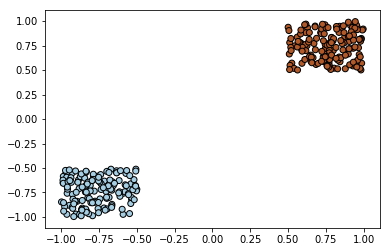

In [167]:
plt.scatter(X_lin_sep_bin[:, 0], X_lin_sep_bin[:, 1], c=y_lin_sep_bin, cmap=plt.cm.Paired, edgecolors='k')

In [168]:
X_nonlin_sep_bin, y_nonlin_sep_bin = nonlin_sep(300, 2)

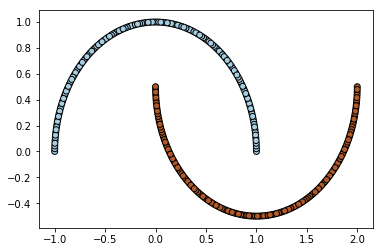

In [169]:
plt.scatter(X_nonlin_sep_bin[:, 0], X_nonlin_sep_bin[:, 1], c=y_nonlin_sep_bin, cmap=plt.cm.Paired, edgecolors='k')

In [170]:
X_non_sep_bin, y_non_sep_bin = non_sep(300, 2)

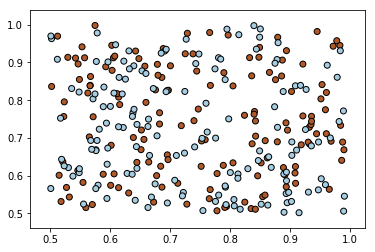

In [171]:
plt.scatter(X_non_sep_bin[:, 0], X_non_sep_bin[:, 1], c=y_non_sep_bin, cmap=plt.cm.Paired, edgecolors='k')

In [172]:
X_notbalanced_bin, y_notbalanced_bin = notbalanced(300, 2)

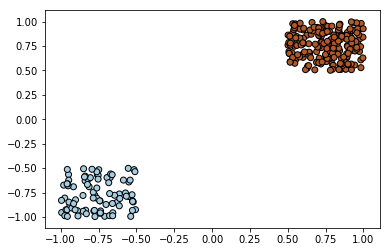

In [173]:
plt.scatter(X_notbalanced_bin[:, 0], X_notbalanced_bin[:, 1], c=y_notbalanced_bin, cmap=plt.cm.Paired, edgecolors='k')

In [174]:
X_with_outliers_bin, y_with_outliers_bin = with_outliers(300, 2)

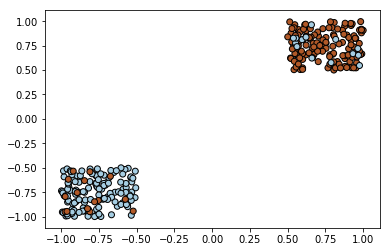

In [175]:
plt.scatter(X_with_outliers_bin[:, 0], X_with_outliers_bin[:, 1], c=y_with_outliers_bin, cmap=plt.cm.Paired, edgecolors='k')

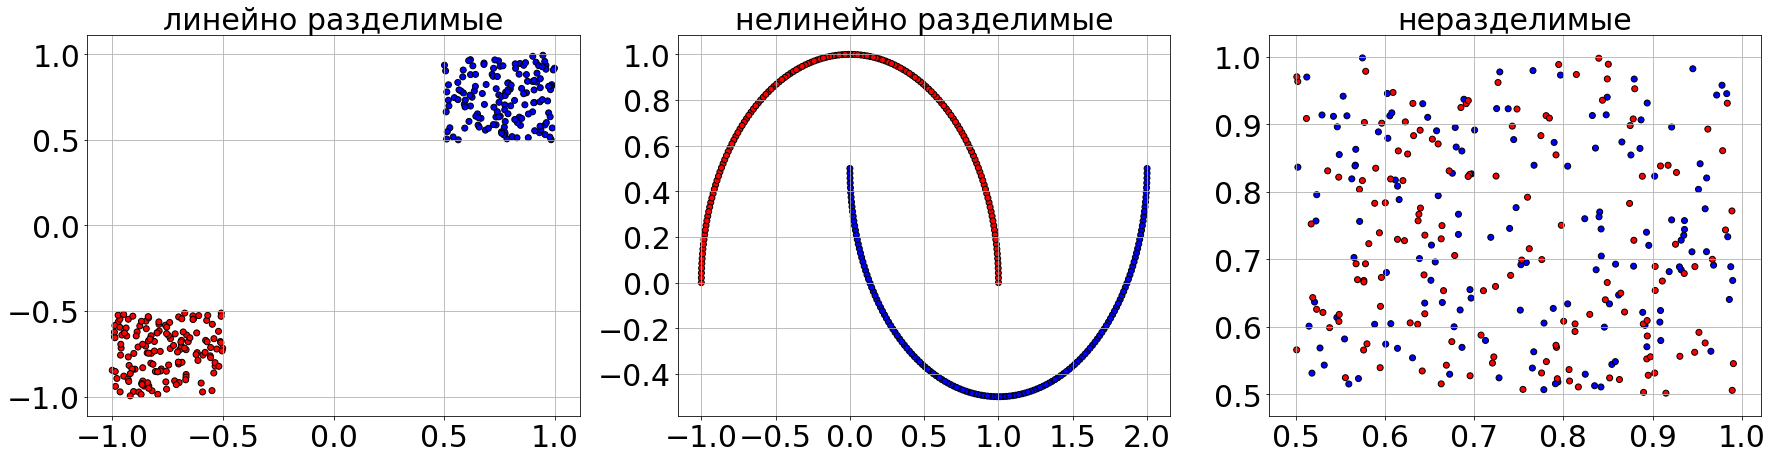

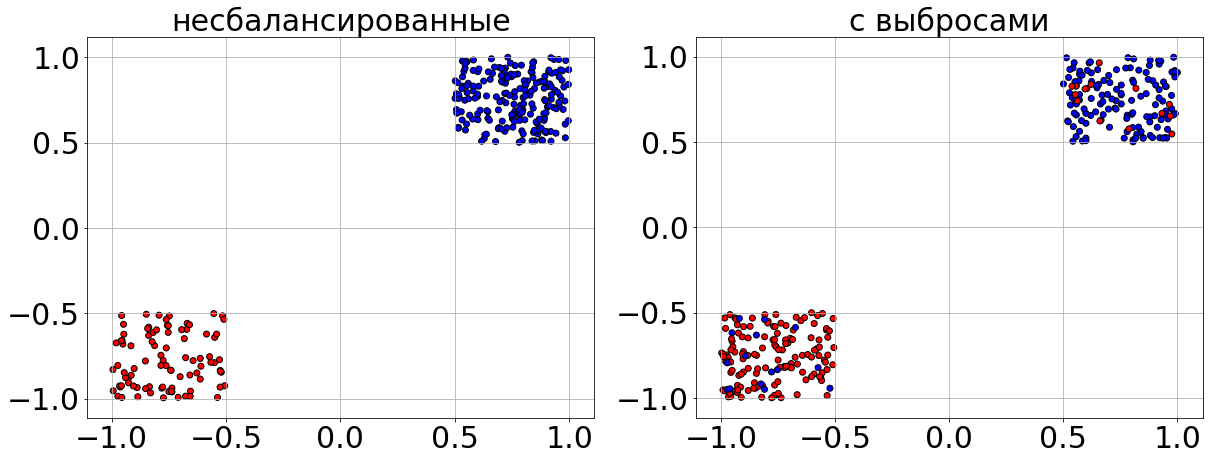

In [197]:
fig, ax = plt.subplots()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig.set_figwidth(30)
fig.set_figheight(7)

plt.subplot(1, 3, 1)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.grid(True)

plt.title('линейно разделимые', fontsize=30)
plt.scatter(X_lin_sep_bin[:, 0], X_lin_sep_bin[:, 1], c=y_lin_sep_bin, cmap=cm_bright, edgecolors='k')


plt.subplot(1, 3, 2)
h = .02 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)

plt.title('нелинейно разделимые', fontsize=30)
plt.scatter(X_nonlin_sep_bin[:, 0], X_nonlin_sep_bin[:, 1], c=y_nonlin_sep_bin, cmap=cm_bright, edgecolors='k')

plt.subplot(1, 3, 3)
h = .02 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.grid(True)
plt.title('неразделимые', fontsize=30)
plt.scatter(X_non_sep_bin[:, 0], X_non_sep_bin[:, 1], c=y_non_sep_bin, cmap=cm_bright, edgecolors='k')

plt.savefig('separated.pdf', bbox_inches='tight')

fig2, ax2 = plt.subplots()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig2.set_figwidth(20)
fig2.set_figheight(7)

plt.subplot(1, 2, 1)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)

plt.grid(True)
plt.title('несбалансированные', fontsize=30)
plt.scatter(X_notbalanced_bin[:, 0], X_notbalanced_bin[:, 1], c=y_notbalanced_bin, cmap=cm_bright, edgecolors='k')

plt.subplot(1, 2, 2)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)

plt.grid(True)
plt.title('с выбросами', fontsize=30)
plt.scatter(X_with_outliers_bin[:, 0], X_with_outliers_bin[:, 1], c=y_with_outliers_bin, cmap=cm_bright, edgecolors='k')


plt.savefig('nonseparated.pdf', bbox_inches='tight')

     pcost       dcost       gap    pres   dres
 0: -5.8469e+01 -2.2131e+01  2e+03  5e+01  5e-15
 1: -3.5616e+00 -2.1674e+01  5e+01  7e-01  4e-15
 2: -2.3629e+00 -9.8236e+00  7e+00  1e-16  8e-16
 3: -2.5587e+00 -3.6429e+00  1e+00  2e-16  6e-16
 4: -2.7387e+00 -3.0945e+00  4e-01  1e-16  4e-16
 5: -2.8279e+00 -2.9078e+00  8e-02  3e-16  4e-16
 6: -2.8445e+00 -2.8803e+00  4e-02  1e-16  4e-16
 7: -2.8534e+00 -2.8661e+00  1e-02  1e-16  4e-16
 8: -2.8577e+00 -2.8599e+00  2e-03  4e-16  5e-16
 9: -2.8585e+00 -2.8587e+00  2e-04  4e-16  5e-16
10: -2.8586e+00 -2.8586e+00  5e-06  1e-16  5e-16
11: -2.8586e+00 -2.8586e+00  5e-08  4e-16  5e-16
Optimal solution found.
[-1. -1. -1. ...,  1.  1.  1.]


(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]), <a list of 11 Text yticklabel objects>)

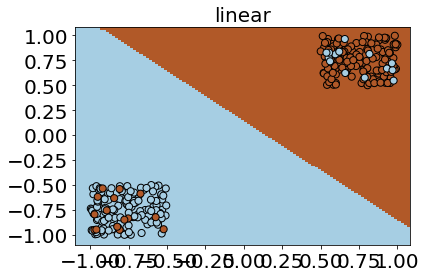

In [279]:
h = .02 


x_min, x_max = X_with_outliers_bin[:, 0].min() - 0.1, X_with_outliers_bin[:, 0].max() + 0.1
y_min, y_max = X_with_outliers_bin[:, 1].min() - 0.1, X_with_outliers_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='linear', method='dual')
clf.fit(X_with_outliers_bin, y_with_outliers_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_with_outliers_bin[:, 0], X_with_outliers_bin[:, 1], c=y_with_outliers_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)
plt.title('linear', fontsize=20)
plt.axis('tight')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [330]:
reload(svm)

<module 'svm' from '/Users/Galya/Documents/Для учебы/5 семестр/Практикум/task_3/svm.py'>

     pcost       dcost       gap    pres   dres
 0: -2.1276e+00 -1.2388e+01  7e+02  3e+01  4e-16
 1: -1.6318e+00 -1.1837e+01  2e+01  3e-01  4e-16
 2: -1.5330e+00 -3.5148e+00  2e+00  9e-16  3e-16
 3: -1.6412e+00 -1.9590e+00  3e-01  4e-16  3e-16
 4: -1.7375e+00 -1.8103e+00  7e-02  2e-16  3e-16
 5: -1.7622e+00 -1.7816e+00  2e-02  4e-16  3e-16
 6: -1.7688e+00 -1.7744e+00  6e-03  4e-16  3e-16
 7: -1.7709e+00 -1.7720e+00  1e-03  6e-16  3e-16
 8: -1.7714e+00 -1.7715e+00  5e-05  1e-15  3e-16
 9: -1.7714e+00 -1.7714e+00  8e-07  1e-15  3e-16
Optimal solution found.
[-1. -1. -1. ...,  1.  1.  1.]


(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]), <a list of 11 Text yticklabel objects>)

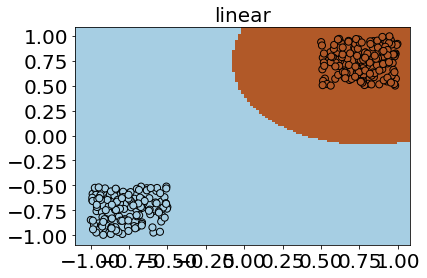

In [321]:
h = .02 


x_min, x_max = X_lin_sep_bin[:, 0].min() - 0.1, X_lin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_lin_sep_bin[:, 1].min() - 0.1, X_lin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=5)
clf.fit(X_lin_sep_bin, y_lin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_lin_sep_bin[:, 0], X_lin_sep_bin[:, 1], c=y_lin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)
plt.title('linear', fontsize=20)
plt.axis('tight')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

     pcost       dcost       gap    pres   dres
 0: -5.7164e+00 -1.6830e+01  8e+02  3e+01  3e-16
 1: -5.3775e+00 -1.6094e+01  4e+01  9e-01  4e-16
 2: -4.7976e+00 -1.0098e+01  5e+00  2e-16  4e-16
 3: -5.0185e+00 -5.4032e+00  4e-01  2e-16  3e-16
 4: -5.1422e+00 -5.1836e+00  4e-02  1e-16  2e-16
 5: -5.1556e+00 -5.1598e+00  4e-03  1e-16  2e-16
 6: -5.1565e+00 -5.1576e+00  1e-03  1e-16  2e-16
 7: -5.1567e+00 -5.1574e+00  8e-04  1e-16  2e-16
 8: -5.1568e+00 -5.1570e+00  2e-04  1e-16  2e-16
 9: -5.1569e+00 -5.1570e+00  1e-04  2e-16  2e-16
10: -5.1569e+00 -5.1570e+00  1e-04  1e-16  2e-16
11: -5.1569e+00 -5.1569e+00  3e-05  1e-16  2e-16
12: -5.1569e+00 -5.1569e+00  1e-05  1e-16  2e-16
13: -5.1569e+00 -5.1569e+00  2e-06  2e-16  2e-16
Optimal solution found.
[-1. -1. -1. ...,  1.  1.  1.]


(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 10 Text yticklabel objects>)

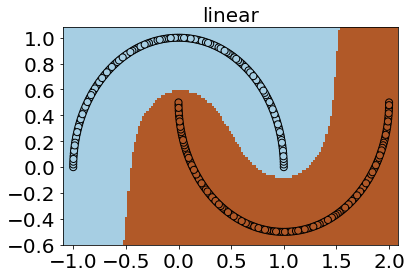

In [305]:
h = .02 


x_min, x_max = X_nonlin_sep_bin[:, 0].min() - 0.1, X_nonlin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_nonlin_sep_bin[:, 1].min() - 0.1, X_nonlin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=7)
clf.fit(X_nonlin_sep_bin, y_nonlin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_nonlin_sep_bin[:, 0], X_nonlin_sep_bin[:, 1], c=y_nonlin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)
plt.title('linear', fontsize=20)
plt.axis('tight')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

     pcost       dcost       gap    pres   dres
 0: -4.9319e+03 -4.5852e+04  4e+04  4e-13  5e-13
 1: -6.0565e+03 -1.0896e+04  5e+03  2e-13  7e-13
 2: -8.8589e+03 -1.0010e+04  1e+03  4e-13  9e-13
 3: -9.1218e+03 -9.7661e+03  6e+02  1e-13  9e-13
 4: -9.3453e+03 -9.5303e+03  2e+02  5e-13  1e-12
 5: -9.4089e+03 -9.4649e+03  6e+01  3e-13  1e-12
 6: -9.4323e+03 -9.4416e+03  9e+00  5e-13  1e-12
 7: -9.4358e+03 -9.4379e+03  2e+00  6e-13  1e-12
 8: -9.4368e+03 -9.4369e+03  1e-01  9e-13  1e-12
 9: -9.4368e+03 -9.4368e+03  2e-03  9e-13  1e-12
Optimal solution found.
[-1. -1. -1. ...,  1.  1.  1.]


(array([ 0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1]),
 <a list of 8 Text yticklabel objects>)

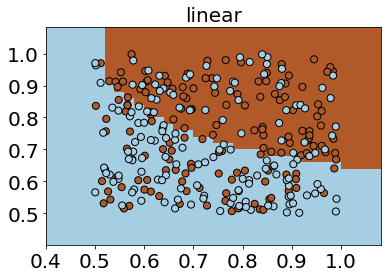

In [348]:
h = .02 


x_min, x_max = X_non_sep_bin[:, 0].min() - 0.1, X_non_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_non_sep_bin[:, 1].min() - 0.1, X_non_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10000, kernel='rbf', method='dual', gamma=0.5)
clf.fit(X_non_sep_bin, y_non_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_non_sep_bin[:, 0], X_non_sep_bin[:, 1], c=y_non_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)
plt.title('linear', fontsize=20)
plt.axis('tight')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

     pcost       dcost       gap    pres   dres
 0: -4.2367e+03 -7.9684e+04  8e+04  1e-12  3e-13
 1: -5.3340e+03 -1.2515e+04  7e+03  9e-13  4e-13
 2: -7.7746e+03 -9.6622e+03  2e+03  9e-13  5e-13
 3: -8.2829e+03 -9.1305e+03  8e+02  2e-12  5e-13
 4: -8.5488e+03 -8.8221e+03  3e+02  6e-13  5e-13
 5: -8.6278e+03 -8.7349e+03  1e+02  6e-14  6e-13
 6: -8.6634e+03 -8.6930e+03  3e+01  8e-13  6e-13
 7: -8.6735e+03 -8.6814e+03  8e+00  1e-12  6e-13
 8: -8.6763e+03 -8.6783e+03  2e+00  3e-12  7e-13
 9: -8.6772e+03 -8.6773e+03  5e-02  4e-12  6e-13
10: -8.6772e+03 -8.6772e+03  7e-04  5e-12  7e-13
Optimal solution found.
[ 1.  1.  1. ...,  1.  1.  1.]


(array([ 0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1]),
 <a list of 8 Text yticklabel objects>)

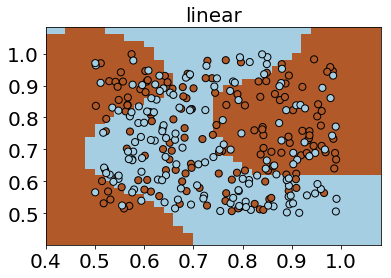

In [351]:
h = .02 


x_min, x_max = X_non_sep_bin[:, 0].min() - 0.1, X_non_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_non_sep_bin[:, 1].min() - 0.1, X_non_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10000, kernel='rbf', method='dual', gamma=10)
clf.fit(X_non_sep_bin, y_non_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_non_sep_bin[:, 0], X_non_sep_bin[:, 1], c=y_non_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.title('linear', fontsize=20)
plt.axis('tight')

plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=50)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

     pcost       dcost       gap    pres   dres
 0: -4.9251e+03 -5.1351e+04  5e+04  1e-12  5e-13
 1: -5.9104e+03 -1.1330e+04  5e+03  8e-13  6e-13
 2: -8.8771e+03 -1.0005e+04  1e+03  9e-13  8e-13
 3: -9.1258e+03 -9.6305e+03  5e+02  2e-12  1e-12
 4: -9.2818e+03 -9.4131e+03  1e+02  4e-13  1e-12
 5: -9.3180e+03 -9.3644e+03  5e+01  9e-13  1e-12
 6: -9.3349e+03 -9.3439e+03  9e+00  1e-12  1e-12
 7: -9.3383e+03 -9.3401e+03  2e+00  2e-13  1e-12
 8: -9.3391e+03 -9.3392e+03  1e-01  2e-12  1e-12
 9: -9.3392e+03 -9.3392e+03  2e-03  1e-12  1e-12
Optimal solution found.
[-1. -1. -1. ...,  1.  1.  1.]


(array([ 0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1]),
 <a list of 8 Text yticklabel objects>)

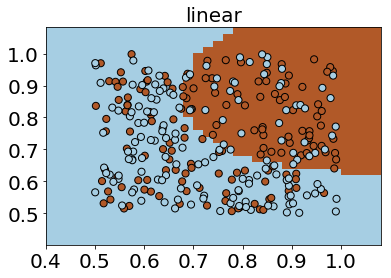

In [352]:
h = .02 


x_min, x_max = X_non_sep_bin[:, 0].min() - 0.1, X_non_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_non_sep_bin[:, 1].min() - 0.1, X_non_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10000, kernel='rbf', method='dual', gamma=1)
clf.fit(X_non_sep_bin, y_non_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_non_sep_bin[:, 0], X_non_sep_bin[:, 1], c=y_non_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.title('linear', fontsize=20)
plt.axis('tight')

plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=50)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

     pcost       dcost       gap    pres   dres
 0: -2.5833e+03 -1.0948e+05  1e+05  8e-13  5e-14
 1: -4.2137e+03 -1.6312e+04  1e+04  1e-12  7e-14
 2: -5.8652e+03 -9.2507e+03  3e+03  6e-13  8e-14
 3: -6.7403e+03 -7.8997e+03  1e+03  2e-13  9e-14
 4: -7.0626e+03 -7.3576e+03  3e+02  4e-13  1e-13
 5: -7.1486e+03 -7.2200e+03  7e+01  1e-12  1e-13
 6: -7.1665e+03 -7.1930e+03  3e+01  1e-13  1e-13
 7: -7.1762e+03 -7.1787e+03  2e+00  5e-13  1e-13
 8: -7.1772e+03 -7.1772e+03  5e-02  6e-13  1e-13
 9: -7.1772e+03 -7.1772e+03  7e-04  1e-12  1e-13
Optimal solution found.
[ 1.  1.  1. ...,  1.  1.  1.]


(array([ 0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1]),
 <a list of 8 Text yticklabel objects>)

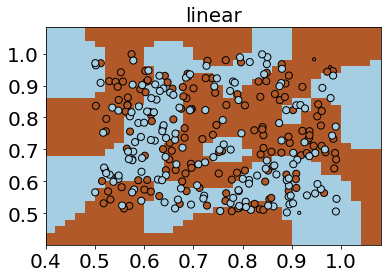

In [353]:
h = .02 


x_min, x_max = X_non_sep_bin[:, 0].min() - 0.1, X_non_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_non_sep_bin[:, 1].min() - 0.1, X_non_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10000, kernel='rbf', method='dual', gamma=100)
clf.fit(X_non_sep_bin, y_non_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_non_sep_bin[:, 0], X_non_sep_bin[:, 1], c=y_non_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.title('linear', fontsize=20)
plt.axis('tight')

plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=50)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

     pcost       dcost       gap    pres   dres
 0: -2.1017e+00 -1.2512e+01  7e+02  3e+01  4e-16
 1: -1.6428e+00 -1.1961e+01  2e+01  4e-01  4e-16
 2: -1.5334e+00 -4.0643e+00  3e+00  1e-16  3e-16
 3: -1.6118e+00 -2.0709e+00  5e-01  2e-16  3e-16
 4: -1.6972e+00 -1.8560e+00  2e-01  1e-16  2e-16
 5: -1.7339e+00 -1.7891e+00  6e-02  6e-16  2e-16
 6: -1.7477e+00 -1.7679e+00  2e-02  3e-16  2e-16
 7: -1.7532e+00 -1.7600e+00  7e-03  4e-16  2e-16
 8: -1.7557e+00 -1.7567e+00  1e-03  1e-15  2e-16
 9: -1.7560e+00 -1.7562e+00  2e-04  9e-16  2e-16
10: -1.7561e+00 -1.7561e+00  6e-06  1e-16  2e-16
11: -1.7561e+00 -1.7561e+00  1e-07  4e-16  2e-16
Optimal solution found.
[-1. -1. -1. ...,  1.  1.  1.]


(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]), <a list of 11 Text yticklabel objects>)

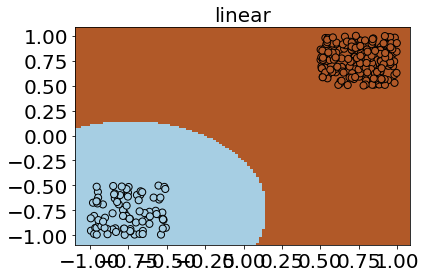

In [313]:
h = .02 


x_min, x_max = X_notbalanced_bin[:, 0].min() - 0.1, X_notbalanced_bin[:, 0].max() + 0.1
y_min, y_max = X_notbalanced_bin[:, 1].min() - 0.1, X_notbalanced_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=5)
clf.fit(X_notbalanced_bin, y_notbalanced_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_notbalanced_bin[:, 0], X_notbalanced_bin[:, 1], c=y_notbalanced_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)
plt.title('linear', fontsize=20)
plt.axis('tight')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

     pcost       dcost       gap    pres   dres
 0: -5.5827e+01 -2.2304e+01  2e+03  5e+01  2e-15
 1: -4.1269e+00 -2.1732e+01  5e+01  7e-01  2e-15
 2: -3.2036e+00 -1.0520e+01  7e+00  1e-16  8e-16
 3: -3.3052e+00 -4.1786e+00  9e-01  1e-16  5e-16
 4: -3.4244e+00 -3.5946e+00  2e-01  9e-16  4e-16
 5: -3.4904e+00 -3.5229e+00  3e-02  4e-16  4e-16
 6: -3.5021e+00 -3.5111e+00  9e-03  7e-16  4e-16
 7: -3.5057e+00 -3.5073e+00  2e-03  1e-16  4e-16
 8: -3.5064e+00 -3.5065e+00  2e-04  1e-16  4e-16
 9: -3.5064e+00 -3.5065e+00  8e-06  2e-16  5e-16
10: -3.5065e+00 -3.5065e+00  4e-07  3e-16  4e-16
Optimal solution found.
[-1. -1. -1. ...,  1.  1.  1.]


(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]), <a list of 11 Text yticklabel objects>)

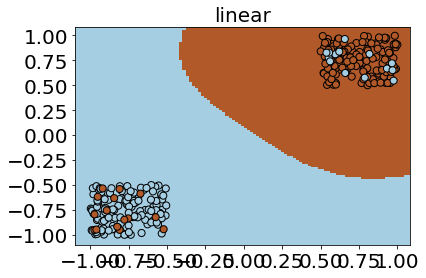

In [316]:
h = .02 


x_min, x_max = X_with_outliers_bin[:, 0].min() - 0.1, X_with_outliers_bin[:, 0].max() + 0.1
y_min, y_max = X_with_outliers_bin[:, 1].min() - 0.1, X_with_outliers_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=3)
clf.fit(X_with_outliers_bin, y_with_outliers_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_with_outliers_bin[:, 0], X_with_outliers_bin[:, 1], c=y_with_outliers_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)
plt.title('linear', fontsize=20)
plt.axis('tight')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

     pcost       dcost       gap    pres   dres
 0: -3.2911e+00 -1.2025e+01  8e+02  3e+01  7e-16
 1: -6.2777e-01 -1.1500e+01  2e+01  4e-01  7e-16
 2: -4.1179e-01 -2.6742e+00  2e+00  3e-16  4e-16
 3: -5.4504e-01 -1.1649e+00  6e-01  4e-16  3e-16
 4: -6.1893e-01 -9.2054e-01  3e-01  2e-16  3e-16
 5: -6.6753e-01 -7.9851e-01  1e-01  1e-16  3e-16
 6: -6.8681e-01 -7.5280e-01  7e-02  1e-16  3e-16
 7: -7.0222e-01 -7.2082e-01  2e-02  4e-16  3e-16
 8: -7.0699e-01 -7.1217e-01  5e-03  1e-16  3e-16
 9: -7.0847e-01 -7.0967e-01  1e-03  1e-16  3e-16
10: -7.0890e-01 -7.0906e-01  2e-04  1e-16  3e-16
11: -7.0897e-01 -7.0897e-01  4e-06  2e-16  3e-16
12: -7.0897e-01 -7.0897e-01  2e-07  2e-16  3e-16
Optimal solution found.
[-1. -1. -1. ...,  1.  1.  1.]


(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]), <a list of 11 Text yticklabel objects>)

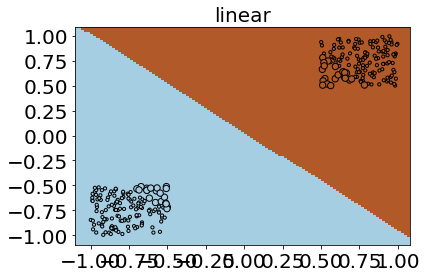

In [346]:
h = .02 


x_min, x_max = X_lin_sep_bin[:, 0].min() - 0.1, X_lin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_lin_sep_bin[:, 1].min() - 0.1, X_lin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='linear', method='dual')
clf.fit(X_lin_sep_bin, y_lin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_lin_sep_bin[:, 0], X_lin_sep_bin[:, 1], c=y_lin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)

plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=40)

plt.title('linear', fontsize=20)
plt.axis('tight')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

     pcost       dcost       gap    pres   dres
 0: -5.5827e+01 -2.2304e+01  2e+03  5e+01  2e-15
 1: -4.1269e+00 -2.1732e+01  5e+01  7e-01  2e-15
 2: -3.2036e+00 -1.0520e+01  7e+00  1e-16  8e-16
 3: -3.3052e+00 -4.1786e+00  9e-01  1e-16  5e-16
 4: -3.4244e+00 -3.5946e+00  2e-01  9e-16  4e-16
 5: -3.4904e+00 -3.5229e+00  3e-02  4e-16  4e-16
 6: -3.5021e+00 -3.5111e+00  9e-03  7e-16  4e-16
 7: -3.5057e+00 -3.5073e+00  2e-03  1e-16  4e-16
 8: -3.5064e+00 -3.5065e+00  2e-04  1e-16  4e-16
 9: -3.5064e+00 -3.5065e+00  8e-06  2e-16  5e-16
10: -3.5065e+00 -3.5065e+00  4e-07  3e-16  4e-16
Optimal solution found.
[-1. -1. -1. ...,  1.  1.  1.]


(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]), <a list of 11 Text yticklabel objects>)

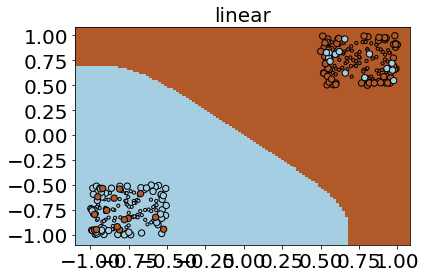

In [336]:
h = .02 


x_min, x_max = X_with_outliers_bin[:, 0].min() - 0.1, X_with_outliers_bin[:, 0].max() + 0.1
y_min, y_max = X_with_outliers_bin[:, 1].min() - 0.1, X_with_outliers_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=3)
clf.fit(X_with_outliers_bin, y_with_outliers_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_with_outliers_bin[:, 0], X_with_outliers_bin[:, 1], c=y_with_outliers_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)

plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=40)


plt.title('linear', fontsize=20)
plt.axis('tight')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

     pcost       dcost       gap    pres   dres
 0: -5.5564e+01 -2.3226e+01  2e+03  5e+01  2e-15
 1: -5.1908e+00 -2.2501e+01  6e+01  9e-01  2e-15
 2: -3.9608e+00 -1.2909e+01  9e+00  9e-16  6e-16
 3: -4.1478e+00 -5.0237e+00  9e-01  9e-17  5e-16
 4: -4.3615e+00 -4.5137e+00  2e-01  9e-17  3e-16
 5: -4.4274e+00 -4.4600e+00  3e-02  8e-16  4e-16
 6: -4.4394e+00 -4.4500e+00  1e-02  6e-16  3e-16
 7: -4.4441e+00 -4.4462e+00  2e-03  4e-16  4e-16
 8: -4.4451e+00 -4.4453e+00  2e-04  8e-16  4e-16
 9: -4.4452e+00 -4.4452e+00  6e-06  8e-16  4e-16
10: -4.4452e+00 -4.4452e+00  6e-08  7e-16  5e-16
Optimal solution found.
[-1. -1. -1. ...,  1.  1.  1.]


(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]), <a list of 11 Text yticklabel objects>)

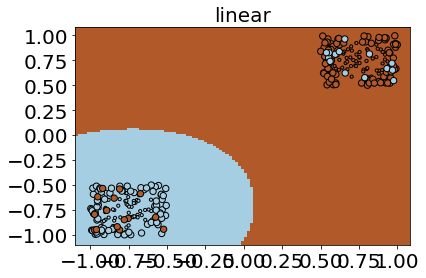

In [337]:
h = .02 


x_min, x_max = X_with_outliers_bin[:, 0].min() - 0.1, X_with_outliers_bin[:, 0].max() + 0.1
y_min, y_max = X_with_outliers_bin[:, 1].min() - 0.1, X_with_outliers_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=10)
clf.fit(X_with_outliers_bin, y_with_outliers_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_with_outliers_bin[:, 0], X_with_outliers_bin[:, 1], c=y_with_outliers_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)

plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=40)


plt.title('linear', fontsize=20)
plt.axis('tight')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

     pcost       dcost       gap    pres   dres
 0: -5.6186e+01 -2.1891e+01  2e+03  5e+01  3e-15
 1: -3.9435e+00 -2.1448e+01  5e+01  7e-01  3e-15
 2: -3.0079e+00 -1.0307e+01  7e+00  1e-16  7e-16
 3: -3.1046e+00 -3.5454e+00  4e-01  6e-16  5e-16
 4: -3.1516e+00 -3.3093e+00  2e-01  3e-16  4e-16
 5: -3.1883e+00 -3.2200e+00  3e-02  7e-16  4e-16
 6: -3.1976e+00 -3.2099e+00  1e-02  3e-16  4e-16
 7: -3.2011e+00 -3.2059e+00  5e-03  2e-16  4e-16
 8: -3.2026e+00 -3.2042e+00  2e-03  6e-16  4e-16
 9: -3.2032e+00 -3.2035e+00  3e-04  6e-16  4e-16
10: -3.2033e+00 -3.2034e+00  3e-05  3e-16  5e-16
11: -3.2034e+00 -3.2034e+00  7e-07  2e-16  6e-16
Optimal solution found.
[-1. -1. -1. ...,  1.  1.  1.]


(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]), <a list of 11 Text yticklabel objects>)

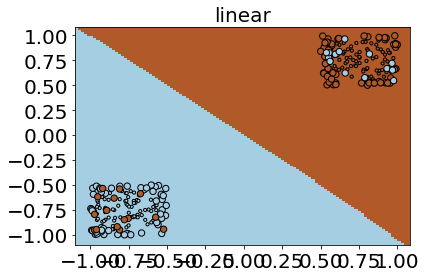

In [338]:
h = .02 


x_min, x_max = X_with_outliers_bin[:, 0].min() - 0.1, X_with_outliers_bin[:, 0].max() + 0.1
y_min, y_max = X_with_outliers_bin[:, 1].min() - 0.1, X_with_outliers_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=1)
clf.fit(X_with_outliers_bin, y_with_outliers_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_with_outliers_bin[:, 0], X_with_outliers_bin[:, 1], c=y_with_outliers_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)

plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=40)


plt.title('linear', fontsize=20)
plt.axis('tight')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

     pcost       dcost       gap    pres   dres
 0: -5.9003e+01 -2.3166e+01  2e+03  5e+01  5e-15
 1: -4.7995e+00 -2.2801e+01  3e+01  3e-01  5e-15
 2: -4.5738e+00 -8.6374e+00  4e+00  6e-16  7e-16
 3: -4.8364e+00 -5.4739e+00  6e-01  1e-15  8e-16
 4: -5.0133e+00 -5.2385e+00  2e-01  2e-15  7e-16
 5: -5.0830e+00 -5.1397e+00  6e-02  4e-16  8e-16
 6: -5.0984e+00 -5.1217e+00  2e-02  2e-15  7e-16
 7: -5.1053e+00 -5.1134e+00  8e-03  1e-15  8e-16
 8: -5.1082e+00 -5.1100e+00  2e-03  4e-16  8e-16
 9: -5.1091e+00 -5.1091e+00  3e-05  1e-15  9e-16
10: -5.1091e+00 -5.1091e+00  3e-07  5e-16  9e-16
Optimal solution found.
[-1. -1. -1. ...,  1.  1.  1.]


(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]), <a list of 11 Text yticklabel objects>)

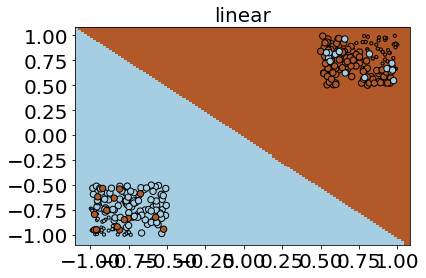

In [339]:
h = .02 


x_min, x_max = X_with_outliers_bin[:, 0].min() - 0.1, X_with_outliers_bin[:, 0].max() + 0.1
y_min, y_max = X_with_outliers_bin[:, 1].min() - 0.1, X_with_outliers_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=0.1)
clf.fit(X_with_outliers_bin, y_with_outliers_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_with_outliers_bin[:, 0], X_with_outliers_bin[:, 1], c=y_with_outliers_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)

plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=40)


plt.title('linear', fontsize=20)
plt.axis('tight')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

     pcost       dcost       gap    pres   dres
 0: -3.2911e+00 -1.2025e+01  8e+02  3e+01  7e-16
 1: -6.2777e-01 -1.1500e+01  2e+01  4e-01  7e-16
 2: -4.1179e-01 -2.6742e+00  2e+00  3e-16  4e-16
 3: -5.4504e-01 -1.1649e+00  6e-01  4e-16  3e-16
 4: -6.1893e-01 -9.2054e-01  3e-01  2e-16  3e-16
 5: -6.6753e-01 -7.9851e-01  1e-01  1e-16  3e-16
 6: -6.8681e-01 -7.5280e-01  7e-02  1e-16  3e-16
 7: -7.0222e-01 -7.2082e-01  2e-02  4e-16  3e-16
 8: -7.0699e-01 -7.1217e-01  5e-03  1e-16  3e-16
 9: -7.0847e-01 -7.0967e-01  1e-03  1e-16  3e-16
10: -7.0890e-01 -7.0906e-01  2e-04  1e-16  3e-16
11: -7.0897e-01 -7.0897e-01  4e-06  2e-16  3e-16
12: -7.0897e-01 -7.0897e-01  2e-07  2e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.9866e+01 -5.5293e+02  2e+03  2e+00  4e-15
 1: -6.9371e+01 -2.9893e+02  3e+02  1e-01  2e-15
 2: -7.2272e+01 -1.0912e+02  4e+01  1e-02  2e-15
 3: -8.0267e+01 -9.0352e+01  1e+01  3e-03  2e-15
 4: -8.1893e+01 -8.7429e+01  6e+00  1e-03  2e-1

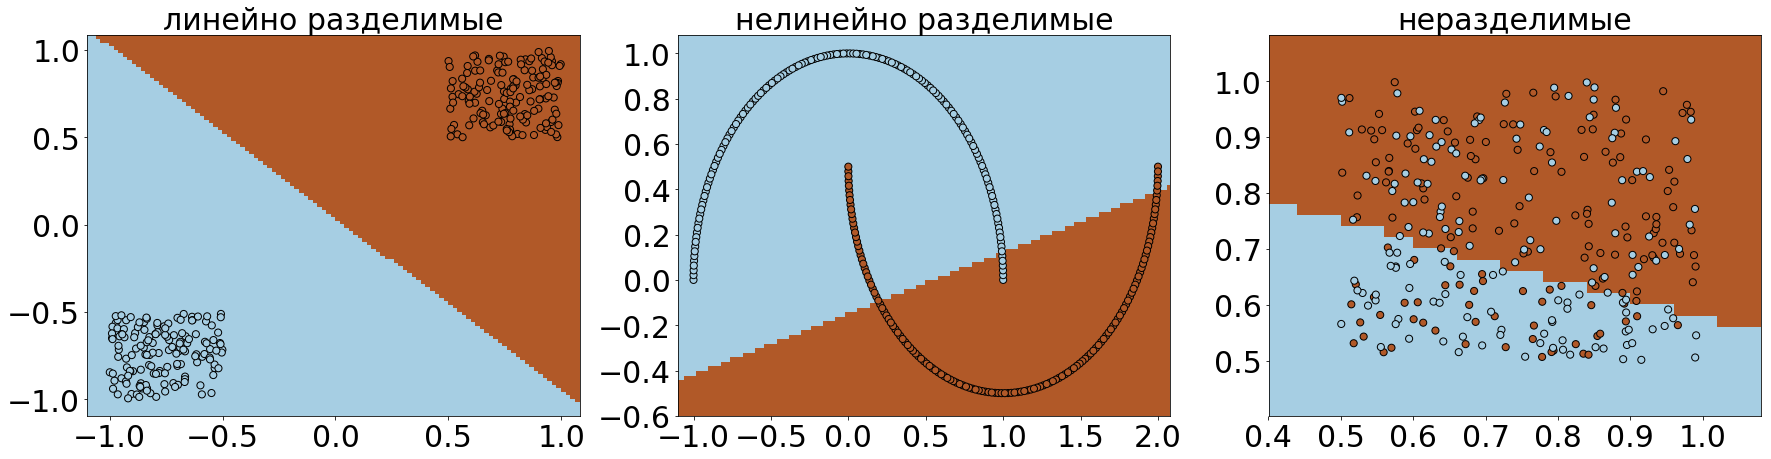

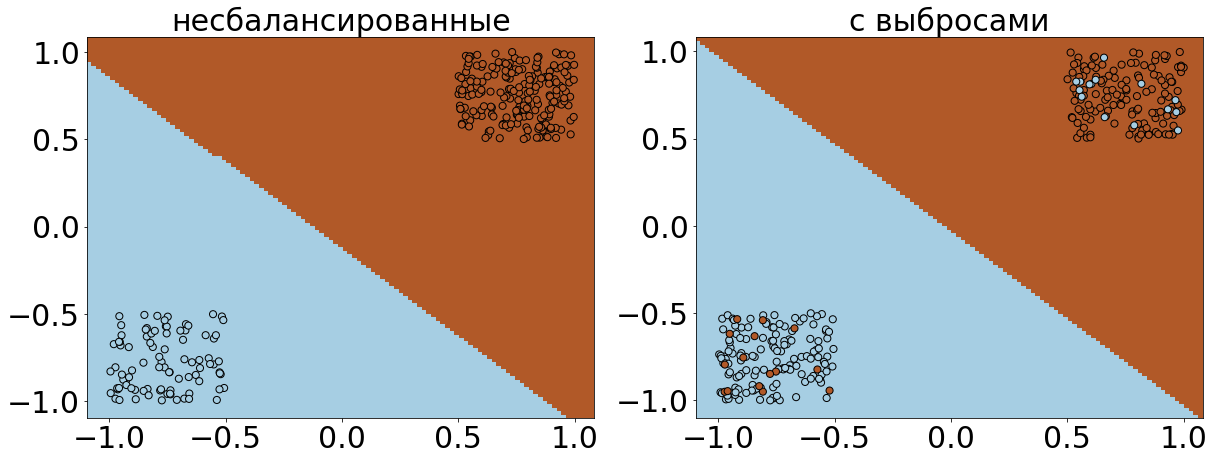

In [361]:
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(7)

plt.subplot(1, 3, 1)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.grid(True)

plt.title('линейно разделимые', fontsize=30)

x_min, x_max = X_lin_sep_bin[:, 0].min() - 0.1, X_lin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_lin_sep_bin[:, 1].min() - 0.1, X_lin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='linear', method='dual')
clf.fit(X_lin_sep_bin, y_lin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_lin_sep_bin[:, 0], X_lin_sep_bin[:, 1], c=y_lin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)





plt.subplot(1, 3, 2)
h = .02 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)

plt.title('нелинейно разделимые', fontsize=30)
x_min, x_max = X_nonlin_sep_bin[:, 0].min() - 0.1, X_nonlin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_nonlin_sep_bin[:, 1].min() - 0.1, X_nonlin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=300, kernel='linear', method='dual')
clf.fit(X_nonlin_sep_bin, y_nonlin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_nonlin_sep_bin[:, 0], X_nonlin_sep_bin[:, 1], c=y_nonlin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)


plt.subplot(1, 3, 3)
h = .02 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.grid(True)
plt.title('неразделимые', fontsize=30)
x_min, x_max = X_non_sep_bin[:, 0].min() - 0.1, X_non_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_non_sep_bin[:, 1].min() - 0.1, X_non_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10000, kernel='linear', method='dual')
clf.fit(X_non_sep_bin, y_non_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_non_sep_bin[:, 0], X_non_sep_bin[:, 1], c=y_non_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)


plt.savefig('separated2.pdf', bbox_inches='tight')

fig2, ax2 = plt.subplots()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig2.set_figwidth(20)
fig2.set_figheight(7)

plt.subplot(1, 2, 1)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)

plt.grid(True)
plt.title('несбалансированные', fontsize=30)
x_min, x_max = X_notbalanced_bin[:, 0].min() - 0.1, X_notbalanced_bin[:, 0].max() + 0.1
y_min, y_max = X_notbalanced_bin[:, 1].min() - 0.1, X_notbalanced_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='linear', method='dual')
clf.fit(X_notbalanced_bin, y_notbalanced_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_notbalanced_bin[:, 0], X_notbalanced_bin[:, 1], c=y_notbalanced_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)


plt.subplot(1, 2, 2)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)

plt.grid(True)
plt.title('с выбросами', fontsize=30)
x_min, x_max = X_with_outliers_bin[:, 0].min() - 0.1, X_with_outliers_bin[:, 0].max() + 0.1
y_min, y_max = X_with_outliers_bin[:, 1].min() - 0.1, X_with_outliers_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='linear', method='dual')
clf.fit(X_with_outliers_bin, y_with_outliers_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_with_outliers_bin[:, 0], X_with_outliers_bin[:, 1], c=y_with_outliers_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)



plt.savefig('nonseparated2.pdf', bbox_inches='tight')

     pcost       dcost       gap    pres   dres
 0: -2.8055e+00 -1.3290e+01  7e+02  3e+01  3e-16
 1: -2.4064e+00 -1.2632e+01  2e+01  5e-01  4e-16
 2: -2.1518e+00 -5.5477e+00  3e+00  1e-16  3e-16
 3: -2.2675e+00 -2.5867e+00  3e-01  6e-16  3e-16
 4: -2.3852e+00 -2.4537e+00  7e-02  2e-15  2e-16
 5: -2.4193e+00 -2.4286e+00  9e-03  1e-15  3e-16
 6: -2.4238e+00 -2.4250e+00  1e-03  5e-16  2e-16
 7: -2.4244e+00 -2.4246e+00  1e-04  1e-16  2e-16
 8: -2.4245e+00 -2.4245e+00  7e-06  7e-16  2e-16
 9: -2.4245e+00 -2.4245e+00  3e-07  3e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1975e+00 -3.3169e+02  3e+02  6e-16  4e-16
 1: -5.9970e+00 -1.6726e+01  1e+01  4e-16  6e-16
 2: -6.5294e+00 -9.2359e+00  3e+00  2e-16  3e-16
 3: -6.7078e+00 -7.0398e+00  3e-01  3e-16  3e-16
 4: -6.7462e+00 -6.7872e+00  4e-02  2e-16  3e-16
 5: -6.7520e+00 -6.7610e+00  9e-03  2e-16  2e-16
 6: -6.7532e+00 -6.7572e+00  4e-03  1e-16  3e-16
 7: -6.7539e+00 -6.7550e+00  1e-03  6e-16  2e-1

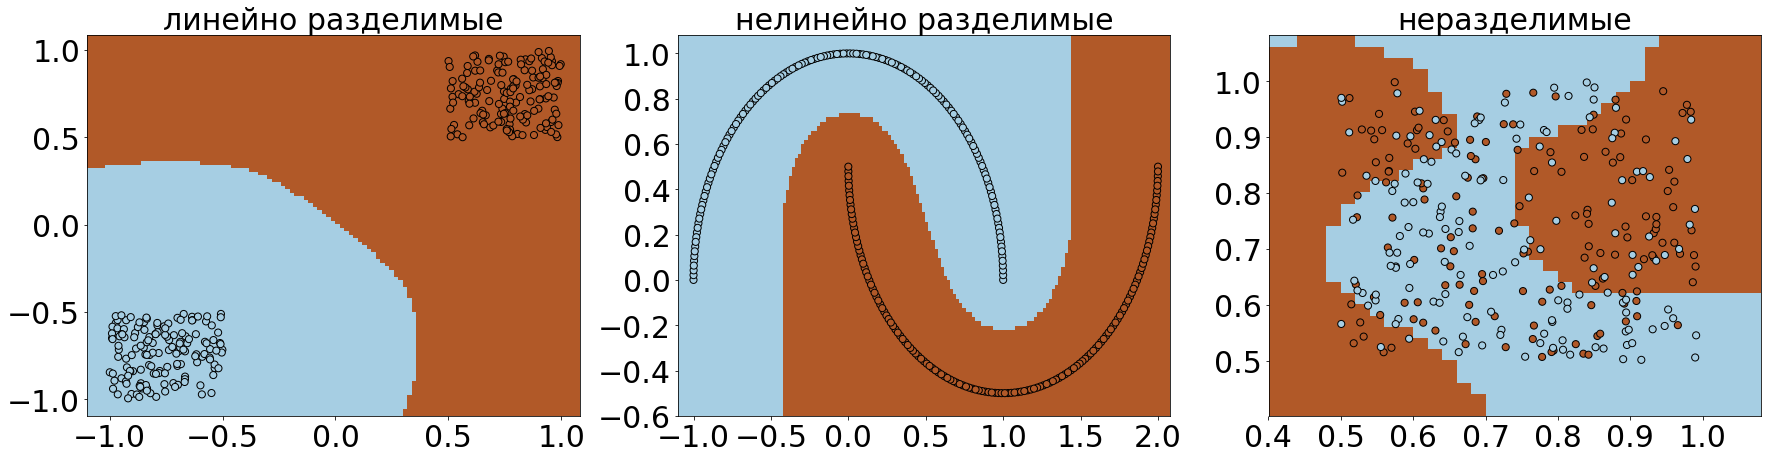

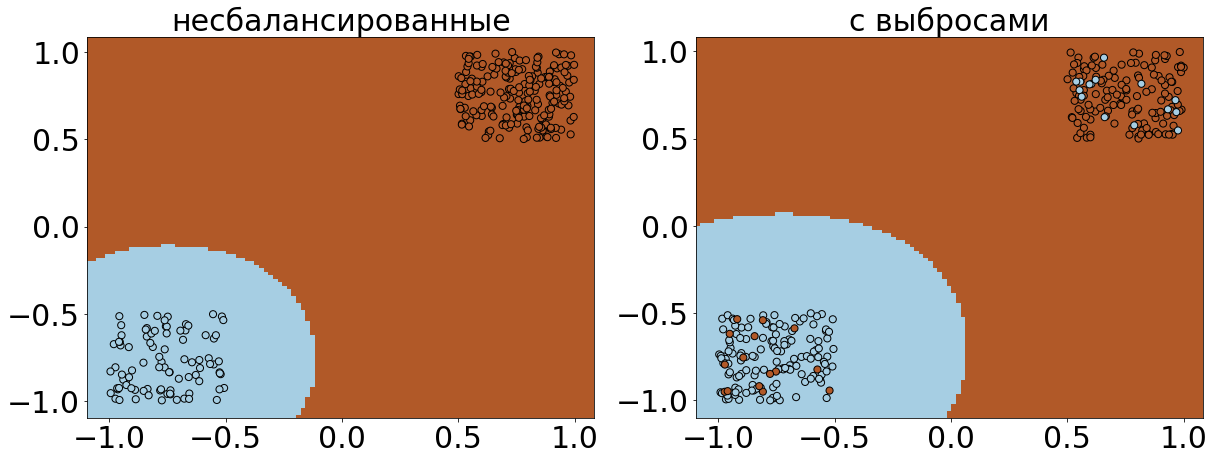

In [363]:
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(7)

plt.subplot(1, 3, 1)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.grid(True)

plt.title('линейно разделимые', fontsize=30)

x_min, x_max = X_lin_sep_bin[:, 0].min() - 0.1, X_lin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_lin_sep_bin[:, 1].min() - 0.1, X_lin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=10)
clf.fit(X_lin_sep_bin, y_lin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_lin_sep_bin[:, 0], X_lin_sep_bin[:, 1], c=y_lin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)





plt.subplot(1, 3, 2)
h = .02 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)

plt.title('нелинейно разделимые', fontsize=30)
x_min, x_max = X_nonlin_sep_bin[:, 0].min() - 0.1, X_nonlin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_nonlin_sep_bin[:, 1].min() - 0.1, X_nonlin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=300, kernel='rbf', method='dual', gamma=10)
clf.fit(X_nonlin_sep_bin, y_nonlin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_nonlin_sep_bin[:, 0], X_nonlin_sep_bin[:, 1], c=y_nonlin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)


plt.subplot(1, 3, 3)
h = .02 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.grid(True)
plt.title('неразделимые', fontsize=30)
x_min, x_max = X_non_sep_bin[:, 0].min() - 0.1, X_non_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_non_sep_bin[:, 1].min() - 0.1, X_non_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10000, kernel='rbf', method='dual', gamma=10)
clf.fit(X_non_sep_bin, y_non_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_non_sep_bin[:, 0], X_non_sep_bin[:, 1], c=y_non_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)


plt.savefig('separated3.pdf', bbox_inches='tight')

fig2, ax2 = plt.subplots()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig2.set_figwidth(20)
fig2.set_figheight(7)

plt.subplot(1, 2, 1)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)

plt.grid(True)
plt.title('несбалансированные', fontsize=30)
x_min, x_max = X_notbalanced_bin[:, 0].min() - 0.1, X_notbalanced_bin[:, 0].max() + 0.1
y_min, y_max = X_notbalanced_bin[:, 1].min() - 0.1, X_notbalanced_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=10)
clf.fit(X_notbalanced_bin, y_notbalanced_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_notbalanced_bin[:, 0], X_notbalanced_bin[:, 1], c=y_notbalanced_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)


plt.subplot(1, 2, 2)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)

plt.grid(True)
plt.title('с выбросами', fontsize=30)
x_min, x_max = X_with_outliers_bin[:, 0].min() - 0.1, X_with_outliers_bin[:, 0].max() + 0.1
y_min, y_max = X_with_outliers_bin[:, 1].min() - 0.1, X_with_outliers_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=10)
clf.fit(X_with_outliers_bin, y_with_outliers_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_with_outliers_bin[:, 0], X_with_outliers_bin[:, 1], c=y_with_outliers_bin, cmap=plt.cm.Paired, edgecolors='k', s=50)



plt.savefig('nonseparated3.pdf', bbox_inches='tight')

     pcost       dcost       gap    pres   dres
 0: -3.2911e+00 -1.2025e+01  8e+02  3e+01  7e-16
 1: -6.2777e-01 -1.1500e+01  2e+01  4e-01  7e-16
 2: -4.1179e-01 -2.6742e+00  2e+00  3e-16  4e-16
 3: -5.4504e-01 -1.1649e+00  6e-01  4e-16  3e-16
 4: -6.1893e-01 -9.2054e-01  3e-01  2e-16  3e-16
 5: -6.6753e-01 -7.9851e-01  1e-01  1e-16  3e-16
 6: -6.8681e-01 -7.5280e-01  7e-02  1e-16  3e-16
 7: -7.0222e-01 -7.2082e-01  2e-02  4e-16  3e-16
 8: -7.0699e-01 -7.1217e-01  5e-03  1e-16  3e-16
 9: -7.0847e-01 -7.0967e-01  1e-03  1e-16  3e-16
10: -7.0890e-01 -7.0906e-01  2e-04  1e-16  3e-16
11: -7.0897e-01 -7.0897e-01  4e-06  2e-16  3e-16
12: -7.0897e-01 -7.0897e-01  2e-07  2e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.9866e+01 -5.5293e+02  2e+03  2e+00  4e-15
 1: -6.9371e+01 -2.9893e+02  3e+02  1e-01  2e-15
 2: -7.2272e+01 -1.0912e+02  4e+01  1e-02  2e-15
 3: -8.0267e+01 -9.0352e+01  1e+01  3e-03  2e-15
 4: -8.1893e+01 -8.7429e+01  6e+00  1e-03  2e-1

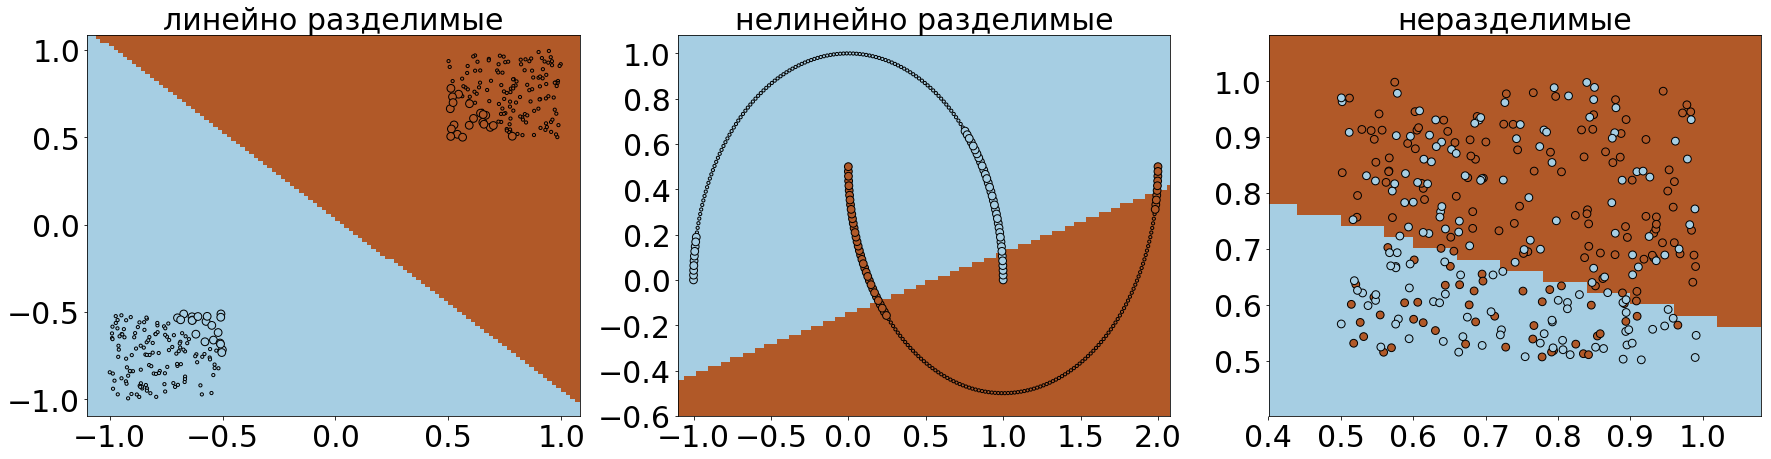

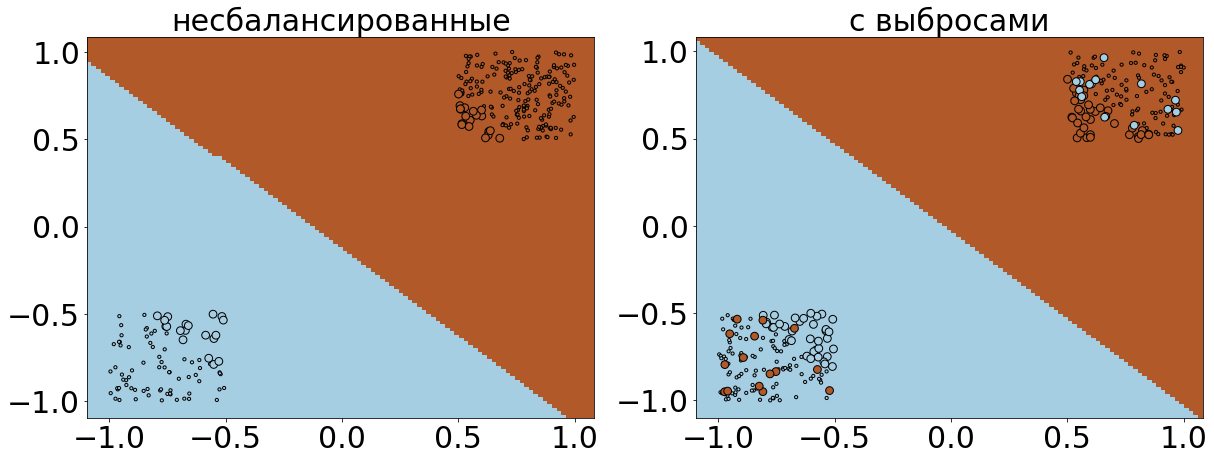

In [485]:
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(7)

plt.subplot(1, 3, 1)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.grid(True)

plt.title('линейно разделимые', fontsize=30)

x_min, x_max = X_lin_sep_bin[:, 0].min() - 0.1, X_lin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_lin_sep_bin[:, 1].min() - 0.1, X_lin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='linear', method='dual')
clf.fit(X_lin_sep_bin, y_lin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_lin_sep_bin[:, 0], X_lin_sep_bin[:, 1], c=y_lin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)

plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=60)



plt.subplot(1, 3, 2)
h = .02 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)

plt.title('нелинейно разделимые', fontsize=30)
x_min, x_max = X_nonlin_sep_bin[:, 0].min() - 0.1, X_nonlin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_nonlin_sep_bin[:, 1].min() - 0.1, X_nonlin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=300, kernel='linear', method='dual')
clf.fit(X_nonlin_sep_bin, y_nonlin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_nonlin_sep_bin[:, 0], X_nonlin_sep_bin[:, 1], c=y_nonlin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=60)

plt.subplot(1, 3, 3)
h = .02 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.grid(True)
plt.title('неразделимые', fontsize=30)
x_min, x_max = X_non_sep_bin[:, 0].min() - 0.1, X_non_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_non_sep_bin[:, 1].min() - 0.1, X_non_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10000, kernel='linear', method='dual')
clf.fit(X_non_sep_bin, y_non_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_non_sep_bin[:, 0], X_non_sep_bin[:, 1], c=y_non_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=60)

plt.savefig('separated4.pdf', bbox_inches='tight')

fig2, ax2 = plt.subplots()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig2.set_figwidth(20)
fig2.set_figheight(7)

plt.subplot(1, 2, 1)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)

plt.grid(True)
plt.title('несбалансированные', fontsize=30)
x_min, x_max = X_notbalanced_bin[:, 0].min() - 0.1, X_notbalanced_bin[:, 0].max() + 0.1
y_min, y_max = X_notbalanced_bin[:, 1].min() - 0.1, X_notbalanced_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='linear', method='dual')
clf.fit(X_notbalanced_bin, y_notbalanced_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_notbalanced_bin[:, 0], X_notbalanced_bin[:, 1], c=y_notbalanced_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=60)

plt.subplot(1, 2, 2)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)

plt.grid(True)
plt.title('с выбросами', fontsize=30)
x_min, x_max = X_with_outliers_bin[:, 0].min() - 0.1, X_with_outliers_bin[:, 0].max() + 0.1
y_min, y_max = X_with_outliers_bin[:, 1].min() - 0.1, X_with_outliers_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='linear', method='dual')
clf.fit(X_with_outliers_bin, y_with_outliers_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_with_outliers_bin[:, 0], X_with_outliers_bin[:, 1], c=y_with_outliers_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)

plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=60)

plt.savefig('nonseparated4.pdf', bbox_inches='tight')

     pcost       dcost       gap    pres   dres
 0: -2.8055e+00 -1.3290e+01  7e+02  3e+01  3e-16
 1: -2.4064e+00 -1.2632e+01  2e+01  5e-01  4e-16
 2: -2.1518e+00 -5.5477e+00  3e+00  1e-16  3e-16
 3: -2.2675e+00 -2.5867e+00  3e-01  6e-16  3e-16
 4: -2.3852e+00 -2.4537e+00  7e-02  2e-15  2e-16
 5: -2.4193e+00 -2.4286e+00  9e-03  1e-15  3e-16
 6: -2.4238e+00 -2.4250e+00  1e-03  5e-16  2e-16
 7: -2.4244e+00 -2.4246e+00  1e-04  1e-16  2e-16
 8: -2.4245e+00 -2.4245e+00  7e-06  7e-16  2e-16
 9: -2.4245e+00 -2.4245e+00  3e-07  3e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1975e+00 -3.3169e+02  3e+02  6e-16  4e-16
 1: -5.9970e+00 -1.6726e+01  1e+01  4e-16  6e-16
 2: -6.5294e+00 -9.2359e+00  3e+00  2e-16  3e-16
 3: -6.7078e+00 -7.0398e+00  3e-01  3e-16  3e-16
 4: -6.7462e+00 -6.7872e+00  4e-02  2e-16  3e-16
 5: -6.7520e+00 -6.7610e+00  9e-03  2e-16  2e-16
 6: -6.7532e+00 -6.7572e+00  4e-03  1e-16  3e-16
 7: -6.7539e+00 -6.7550e+00  1e-03  6e-16  2e-1

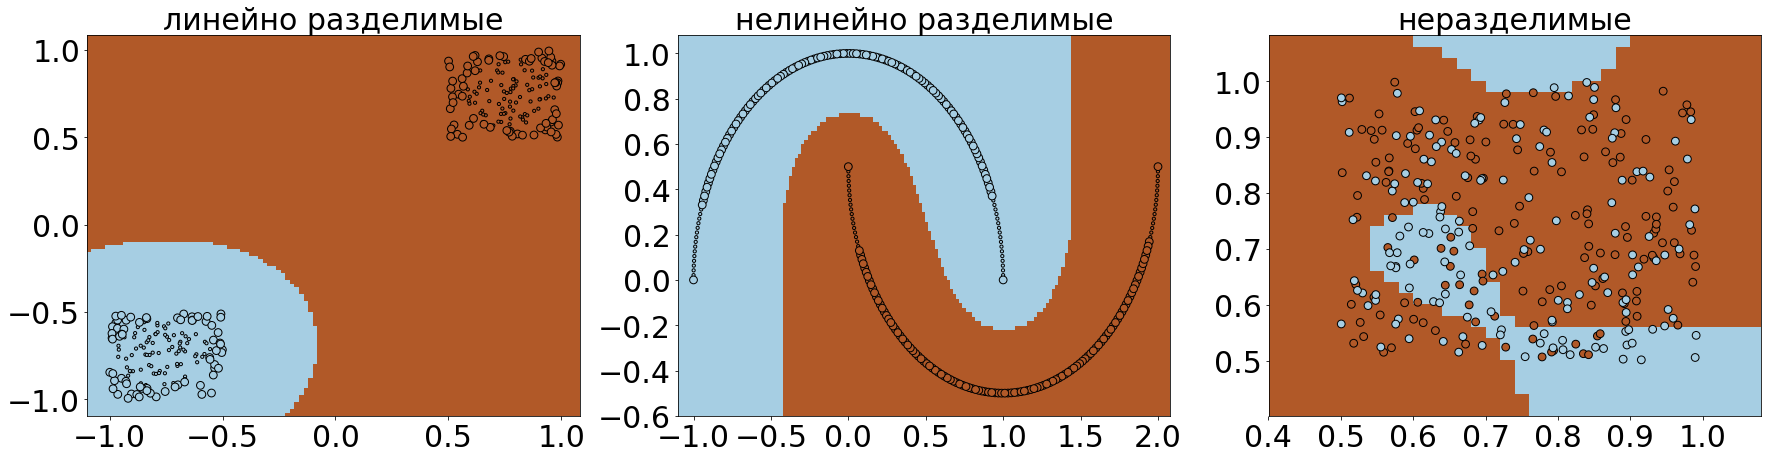

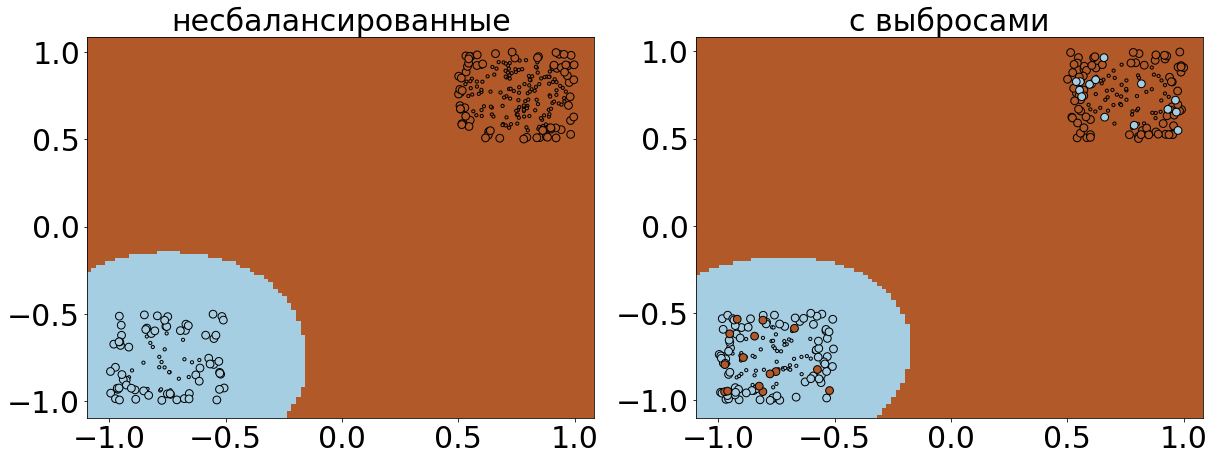

In [486]:
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(7)

plt.subplot(1, 3, 1)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.grid(True)

plt.title('линейно разделимые', fontsize=30)

x_min, x_max = X_lin_sep_bin[:, 0].min() - 0.1, X_lin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_lin_sep_bin[:, 1].min() - 0.1, X_lin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=10)
clf.fit(X_lin_sep_bin, y_lin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_lin_sep_bin[:, 0], X_lin_sep_bin[:, 1], c=y_lin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=60)






plt.subplot(1, 3, 2)
h = .02 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)

plt.title('нелинейно разделимые', fontsize=30)
x_min, x_max = X_nonlin_sep_bin[:, 0].min() - 0.1, X_nonlin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_nonlin_sep_bin[:, 1].min() - 0.1, X_nonlin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=300, kernel='rbf', method='dual', gamma=10)
clf.fit(X_nonlin_sep_bin, y_nonlin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_nonlin_sep_bin[:, 0], X_nonlin_sep_bin[:, 1], c=y_nonlin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=60)



plt.subplot(1, 3, 3)
h = .02 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.grid(True)
plt.title('неразделимые', fontsize=30)
x_min, x_max = X_non_sep_bin[:, 0].min() - 0.1, X_non_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_non_sep_bin[:, 1].min() - 0.1, X_non_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10000, kernel='rbf', method='dual', gamma=10)
clf.fit(X_non_sep_bin, y_non_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_non_sep_bin[:, 0], X_non_sep_bin[:, 1], c=y_non_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=60)



plt.savefig('separated5.pdf', bbox_inches='tight')

fig2, ax2 = plt.subplots()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig2.set_figwidth(20)
fig2.set_figheight(7)

plt.subplot(1, 2, 1)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)

plt.grid(True)
plt.title('несбалансированные', fontsize=30)
x_min, x_max = X_notbalanced_bin[:, 0].min() - 0.1, X_notbalanced_bin[:, 0].max() + 0.1
y_min, y_max = X_notbalanced_bin[:, 1].min() - 0.1, X_notbalanced_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=10)
clf.fit(X_notbalanced_bin, y_notbalanced_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_notbalanced_bin[:, 0], X_notbalanced_bin[:, 1], c=y_notbalanced_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=60)



plt.subplot(1, 2, 2)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)

plt.grid(True)
plt.title('с выбросами', fontsize=30)
x_min, x_max = X_with_outliers_bin[:, 0].min() - 0.1, X_with_outliers_bin[:, 0].max() + 0.1
y_min, y_max = X_with_outliers_bin[:, 1].min() - 0.1, X_with_outliers_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=10)
clf.fit(X_with_outliers_bin, y_with_outliers_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_with_outliers_bin[:, 0], X_with_outliers_bin[:, 1], c=y_with_outliers_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=60)




plt.savefig('nonseparated5.pdf', bbox_inches='tight')

     pcost       dcost       gap    pres   dres
 0: -1.2076e+00 -1.1455e+01  6e+02  3e+01  3e-16
 1: -1.1019e+00 -1.1033e+01  1e+01  9e-02  3e-16
 2: -1.0955e+00 -1.4896e+00  4e-01  2e-04  3e-16
 3: -1.1229e+00 -1.3490e+00  2e-01  8e-05  3e-16
 4: -1.1479e+00 -1.2601e+00  1e-01  4e-05  2e-16
 5: -1.1661e+00 -1.2187e+00  5e-02  1e-05  2e-16
 6: -1.1769e+00 -1.2004e+00  2e-02  6e-06  2e-16
 7: -1.1809e+00 -1.1938e+00  1e-02  3e-06  2e-16
 8: -1.1836e+00 -1.1896e+00  6e-03  1e-06  2e-16
 9: -1.1853e+00 -1.1870e+00  2e-03  2e-07  3e-16
10: -1.1858e+00 -1.1862e+00  4e-04  1e-16  3e-16
11: -1.1860e+00 -1.1861e+00  4e-05  1e-16  2e-16
12: -1.1860e+00 -1.1860e+00  7e-07  1e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8055e+00 -1.3290e+01  7e+02  3e+01  3e-16
 1: -2.4064e+00 -1.2632e+01  2e+01  5e-01  4e-16
 2: -2.1518e+00 -5.5477e+00  3e+00  1e-16  3e-16
 3: -2.2675e+00 -2.5867e+00  3e-01  6e-16  3e-16
 4: -2.3852e+00 -2.4537e+00  7e-02  2e-15  2e-1

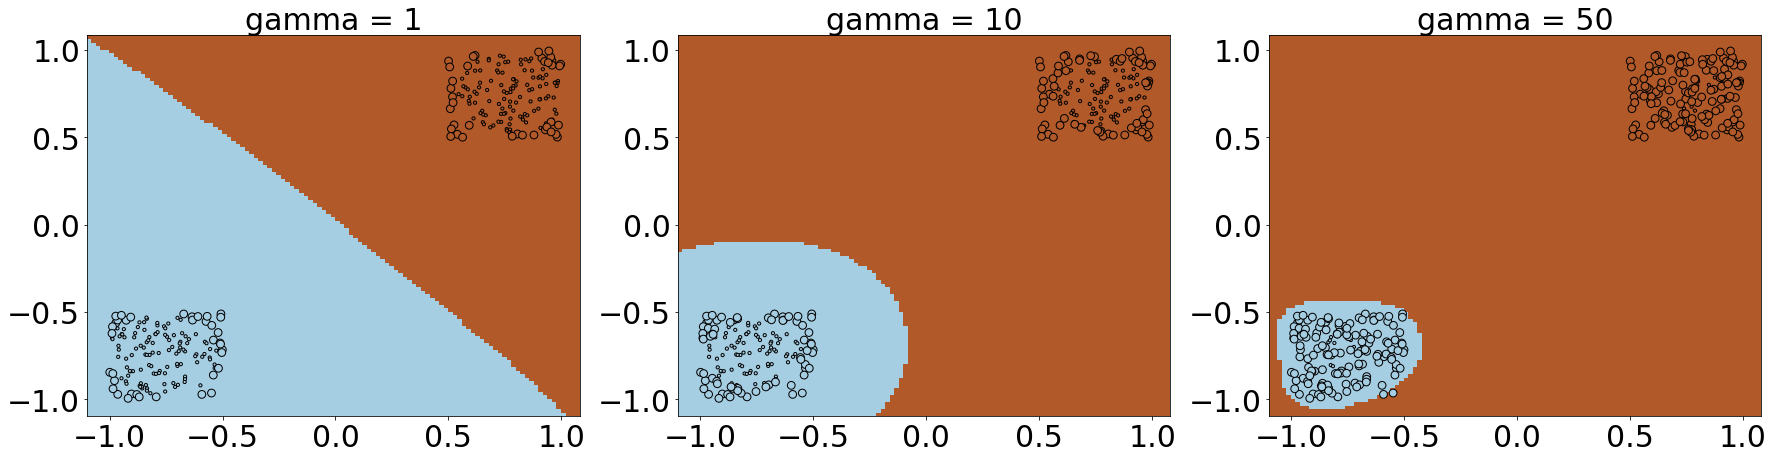

In [487]:
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(7)

plt.subplot(1, 3, 1)
h = .02 
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.grid(True)

plt.title('gamma = 1', fontsize=30)

x_min, x_max = X_lin_sep_bin[:, 0].min() - 0.1, X_lin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_lin_sep_bin[:, 1].min() - 0.1, X_lin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=1)
clf.fit(X_lin_sep_bin, y_lin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_lin_sep_bin[:, 0], X_lin_sep_bin[:, 1], c=y_lin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=60)






plt.subplot(1, 3, 2)
h = .02  
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.grid(True)

plt.title('gamma = 10', fontsize=30)

x_min, x_max = X_lin_sep_bin[:, 0].min() - 0.1, X_lin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_lin_sep_bin[:, 1].min() - 0.1, X_lin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=10)
clf.fit(X_lin_sep_bin, y_lin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_lin_sep_bin[:, 0], X_lin_sep_bin[:, 1], c=y_lin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=60)





plt.subplot(1, 3, 3)
h = .02  
plt.xticks(np.arange(-1, 1.5, 0.5), fontsize=30)
plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=30)

plt.grid(True)
plt.title('gamma = 50', fontsize=30)

x_min, x_max = X_lin_sep_bin[:, 0].min() - 0.1, X_lin_sep_bin[:, 0].max() + 0.1
y_min, y_max = X_lin_sep_bin[:, 1].min() - 0.1, X_lin_sep_bin[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf = svm.SVMSolver(C=10, kernel='rbf', method='dual', gamma=50)
clf.fit(X_lin_sep_bin, y_lin_sep_bin)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_lin_sep_bin[:, 0], X_lin_sep_bin[:, 1], c=y_lin_sep_bin, cmap=plt.cm.Paired, edgecolors='k', s=10)
plt.scatter(clf.support_vectors[:, 0], clf.support_vectors[:, 1], c=clf.support_answers, cmap=plt.cm.Paired, edgecolors='k', s=60)




plt.savefig('separated6.pdf', bbox_inches='tight')
